# **Project Name**    - Cardiovasculer Risk Predication



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual


# **Project Summary -**


In this project, we conducted an in-depth exploratory data analysis (EDA) and implemented machine learning models to predict the likelihood of developing coronary heart disease (CHD) over a ten-year period. The dataset, comprising 17 columns and 3390 rows, underwent comprehensive data cleaning, addressing missing values and outliers to prepare it for analysis. Key observations from the EDA provided valuable insights into the dataset's characteristics:

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**




Coronary Heart Disease (CHD) poses a significant health risk globally. Predicting CHD is vital for early intervention and improved patient outcomes. However, developing an accurate predictive model faces challenges:

1. **Data Quality:** Healthcare datasets often have missing values and inconsistencies, demanding thorough cleaning.
2. **Imbalanced Data:** CHD cases are rare, causing a significant class imbalance, impacting model accuracy.
3. **Feature Selection:** Identifying relevant features and engineering new ones is essential for precise predictions.
4. **Interpretability vs. Accuracy:** Balancing interpretability with high accuracy is crucial for healthcare professionals' trust.
5. **Continuous Updates:** Healthcare data changes over time, requiring continuous model monitoring and updates.

**Objective:**

This project aims to create a reliable and interpretable CHD predictive model, overcoming data challenges. By addressing data quality, class imbalance, and ensuring interpretability, the goal is to empower healthcare professionals with actionable insights, ultimately improving patient care and outcomes.

## **1. Know Your Data**

### Import Libraries

In [1]:
# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Adarshsardhara/ML-Project/main/Cardiovascular%20Risk%20Prediction%20/DataSet/data_cardiovascular_risk.csv')


### Dataset First View

In [3]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
Duplicate_row = df[df.duplicated()]
Duplicate_row

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

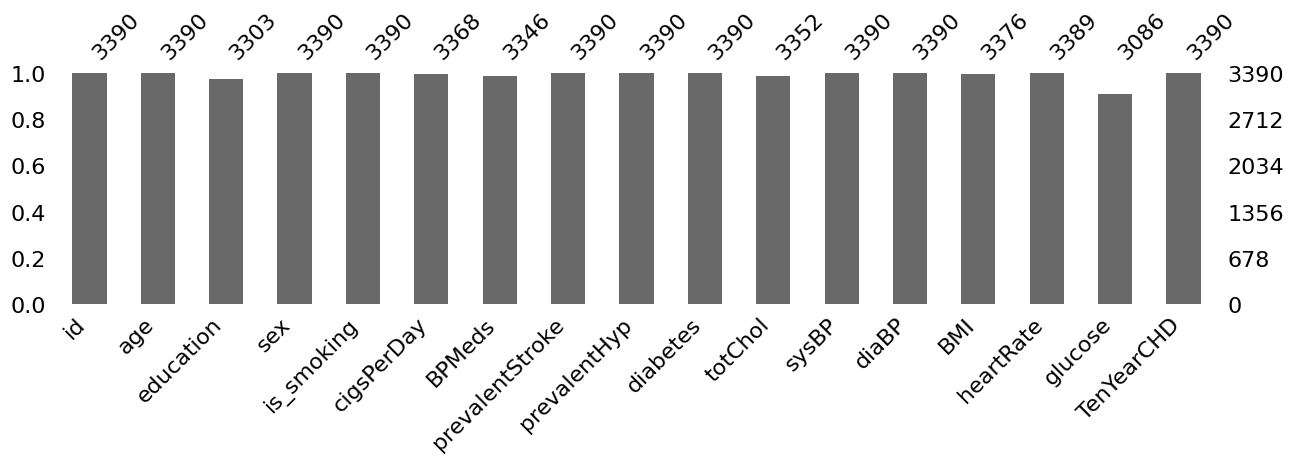

In [8]:
# Visualizing the missing values
import missingno as msno
msno.bar(df,figsize=(15,3))

# What did you know about your dataset?
 ## By shallow looking this dataset We come to know about primary information like
 - This  dataset contains 17 Columns and 3390 Rows.
 - In this there is no Duplicate values.
 - some of attiributes contains Null values and Missing values.


## **2. Understanding Variables**

In [9]:
# Dataset Columns
Dataset_Columns= df.columns
Dataset_Columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Variables Description

   - **id**: Unique identifier for each individual.
   - **age**: Age of the individual.
   - **education**: Education level (numerical scale).
   - **sex**: Gender of the individual (M for Male, F for Female).
   - **is_smoking**: Smoking status (YES/NO).
   - **cigsPerDay**: Number of cigarettes smoked per day.
   - **BPMeds**: Whether the individual is on blood pressure medications (1 for Yes, 0 for No).
   - **prevalentStroke**: History of stroke (1 for Yes, 0 for No).
   - **prevalentHyp**: Prevalent hypertension (1 for Yes, 0 for No).
   - **diabetes**: Diabetes status (1 for Yes, 0 for No).
   - **totChol**: Total cholesterol levels.
   - **sysBP**: Systolic blood pressure.
   - **diaBP**: Diastolic blood pressure.
   - **BMI**: Body Mass Index.
   - **heartRate**: Heart rate.
   - **glucose**: Glucose levels.
   - **TenYearCHD**: Whether the individual experienced a coronary heart disease event in the next ten years (1 for Yes, 0 for No).

## **3.Data Wrangling**

In [10]:
# Dropping the unnecessary column
df.drop(columns=['id'], inplace=True)

In [11]:
# Handling Null Values or Missing Values
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['cigsPerDay'].fillna(0, inplace=True)
df['BPMeds'].fillna(0, inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

In [12]:
# Again checking is there any null values are not
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## **Task Done**

- After the completion of the data wrangling process, the dataset was thoroughly cleaned and prepared for analysis.

- Initially, several columns in the dataset contained missing values. Through appropriate strategies for each column, including filling missing values with means, modes, or specific values like zero, all missing values were successfully addressed.

-   Every column in the dataset, including 'totChol', 'glucose', 'BMI', 'heartRate', and others, no longer contains any missing values. Every individual feature is now complete and ready for analysis.



## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **Numeric and Categorical features**

In [13]:
# Splitting features into numeric and categoric.
numeric_features = []
categorical_features = []

for col in df.columns:
  if df[col].nunique() > 10:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')


numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


### **Univariate Analysis**

#### **Distribution of Numeric features**

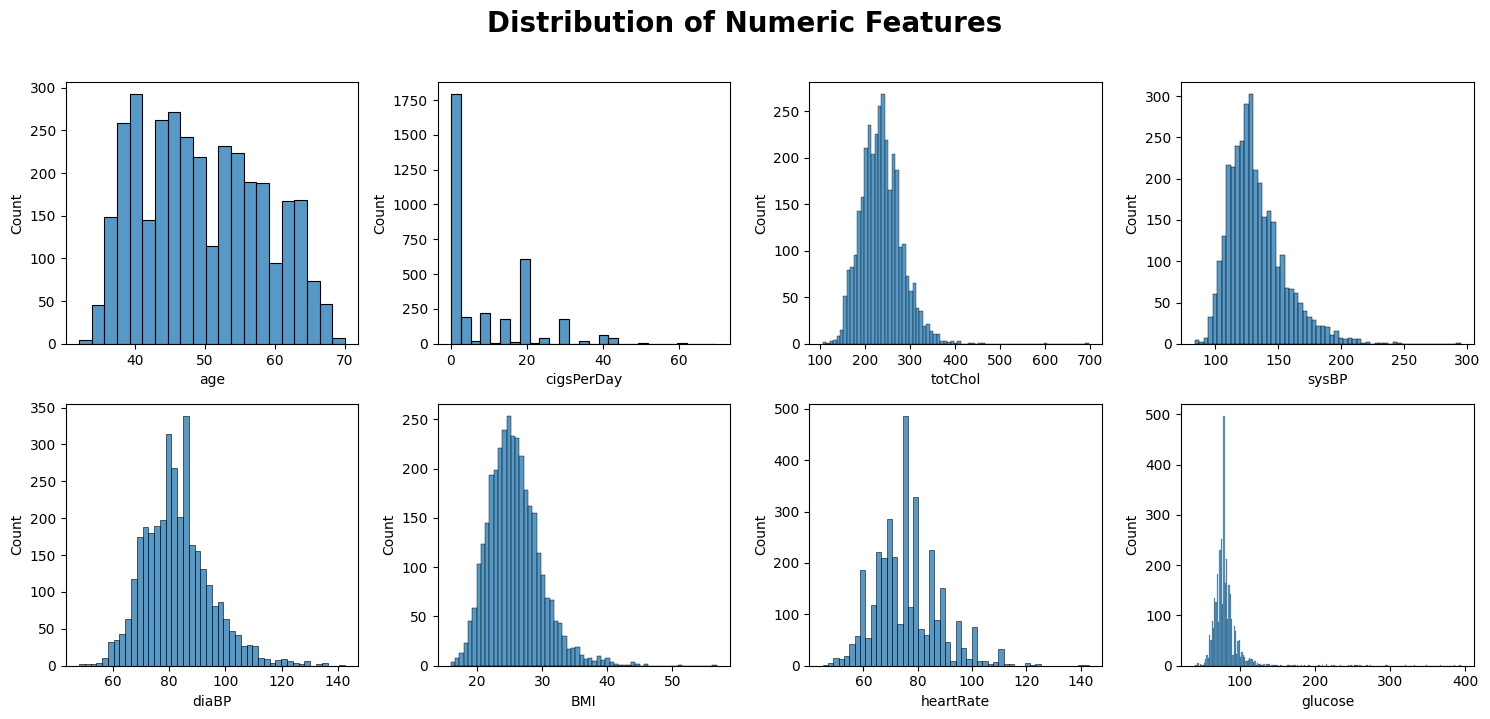

In [14]:
# figsize
plt.figure(figsize=(15, 7))
# title
plt.suptitle('Distribution of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numeric_features):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col])
    plt.xlabel(col)
    plt.tight_layout()

#### **Outlier in Numeric features**

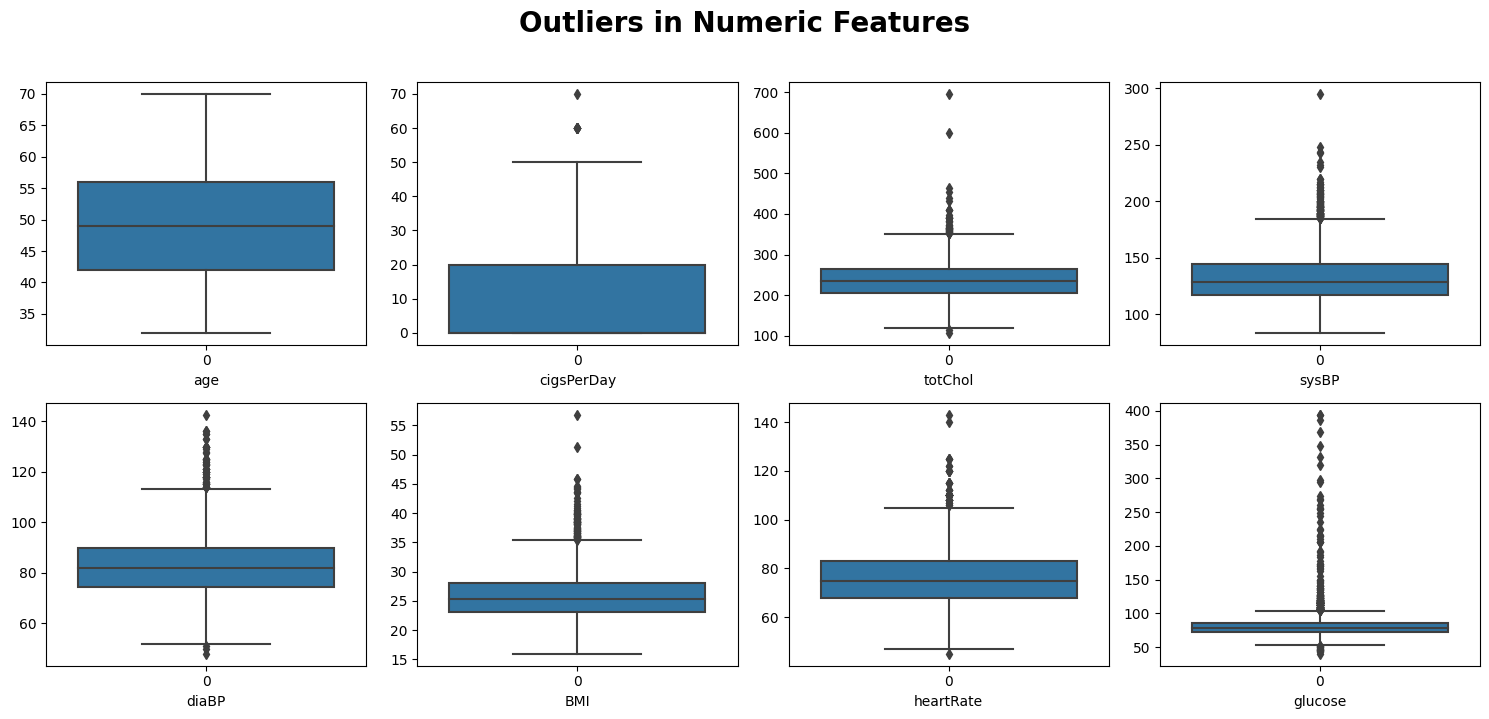

In [15]:
# figsize
plt.figure(figsize=(15,7))
# title
plt.suptitle('Outliers in Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)

  # boxplots
  sns.boxplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observations:**

1. **Right-Skewed Distributions:** Most numerical features exhibit right-skewed patterns, signifying a concentration of lower values. 'totChol' and 'BMI' share similar distributions.

2. **Highly Skewed Glucose:** The 'glucose' feature is highly right-skewed, indicating a notable number of extremely high values and significant outlier presence.

3. **Outliers in Multiple Features:** 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose' display outliers. These anomalies can influence analyses and require careful handling for accurate interpretations and modeling. Addressing outliers is crucial for reliable insights and predictions.

#### **Analysis of Categorical Features**

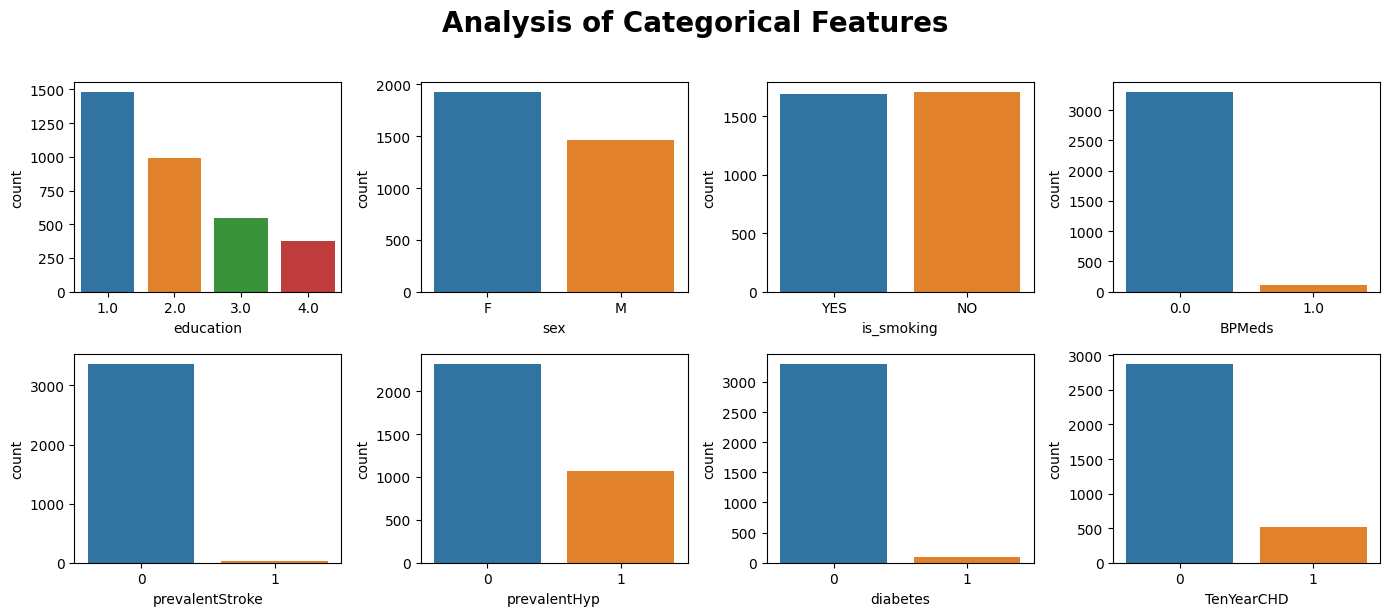

In [16]:
# figsize
plt.figure(figsize=(14, 6))
# title
plt.suptitle('Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(categorical_features):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


**Observations**

1. Majority of individuals are in 'education' category 1, with fewer in category 4.
2. Female patients outnumber males in the dataset.
3. Distribution of smokers and non-smokers is almost equal.
4. Most patients do not take blood pressure medication.
5. Few patients had experienced a previous stroke.
6. Lower proportion of patients had a history of hypertension.
7. Diabetes was found in a smaller number of patients.
8. Fewer patients are at risk of coronary heart disease over the next 10 years, indicating data imbalance for the target variable.

### **Multivariate Analysis**

####**Scatter plot between target varible, to age and heartRate**

Text(0, 0.5, 'Heart Rate')

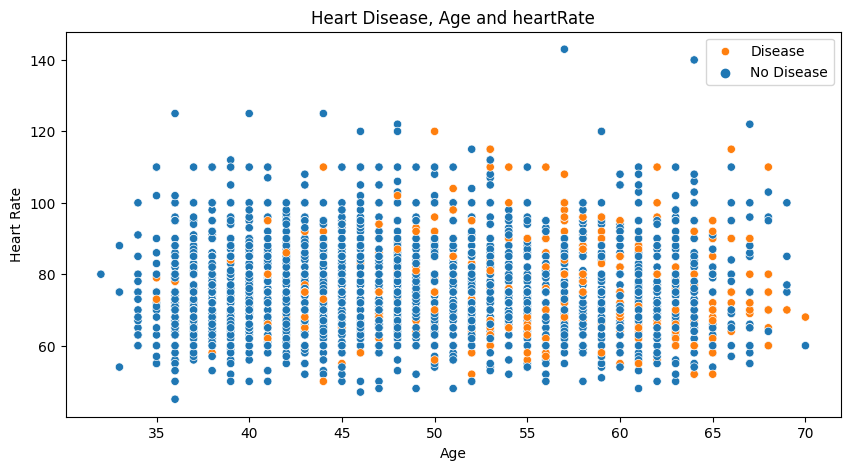

In [17]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease

plt.figure(figsize=(10,5))
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df)

plt.title('Heart Disease, Age and heartRate')
plt.legend(['Disease', 'No Disease'])
plt.xlabel('Age')
plt.ylabel('Heart Rate')

**Observation:**

The analysis involves age, TenYearCHD (heart disease presence), and heartRate. Age shows a clear association with heart disease, indicating higher risk as age increases. However, there's no substantial correlation between heart disease and heart rate, suggesting heart rate alone might not be a significant predictor for the condition.

### **Regression Plot with Numerical Features**

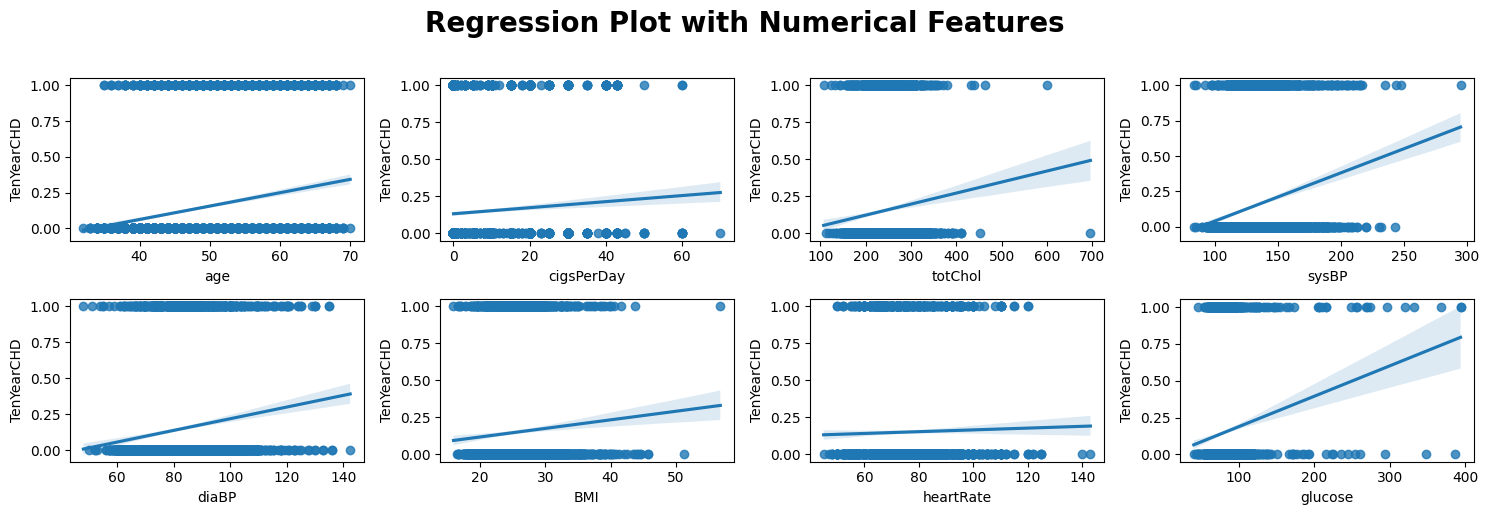

In [18]:
# Checking Linearity of all numerical features with the target variable

# Filter out non-numeric values in 'TenYearCHD' column
df['TenYearCHD'] = pd.to_numeric(df['TenYearCHD'], errors='coerce').fillna(0).astype(int)

# Selecting numerical features
numeric_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Plotting linearity
plt.figure(figsize=(15, 5))
# title
plt.suptitle('Regression Plot with Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.regplot(x=df[col], y=df['TenYearCHD'], data=df)
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


 **Observation:**

Several independent numerical variables exhibit a positive relationship with the target variable. This indicates that as these numerical features increase, the likelihood of the target variable (TenYearCHD) being true (or 1) also increases. These relationships suggest a positive correlation between these features and the risk of coronary heart disease over a ten-year period.

### **Bivariate Analysis**

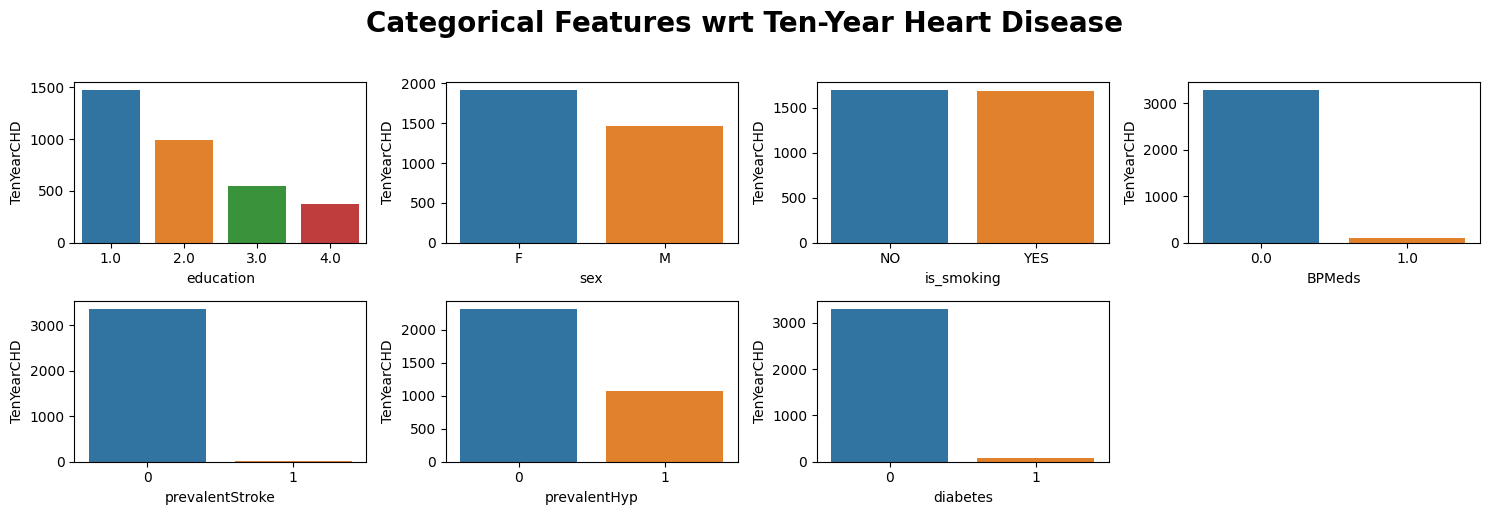

In [19]:
# Counting number of categories present in each feature with respect to target feature

# figsize
plt.figure(figsize=(15, 5))
# title
plt.suptitle("Categorical Features wrt Ten-Year Heart Disease", fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(categorical_features[:-1]):
    plt.subplot(2, 4, i + 1)

    # Counting and sorting categories
    category_counts = df.groupby(col)[['TenYearCHD']].count().reset_index()
    category_counts = category_counts.sort_values(by='TenYearCHD', ascending=False)

    # Barplot with sorted categories
    sns.barplot(x=category_counts[col], y=category_counts['TenYearCHD'])
    plt.xlabel(col)
    plt.tight_layout()

# Show the plots
plt.show()


## **Data Clean Up**

####**Treating Outliers**

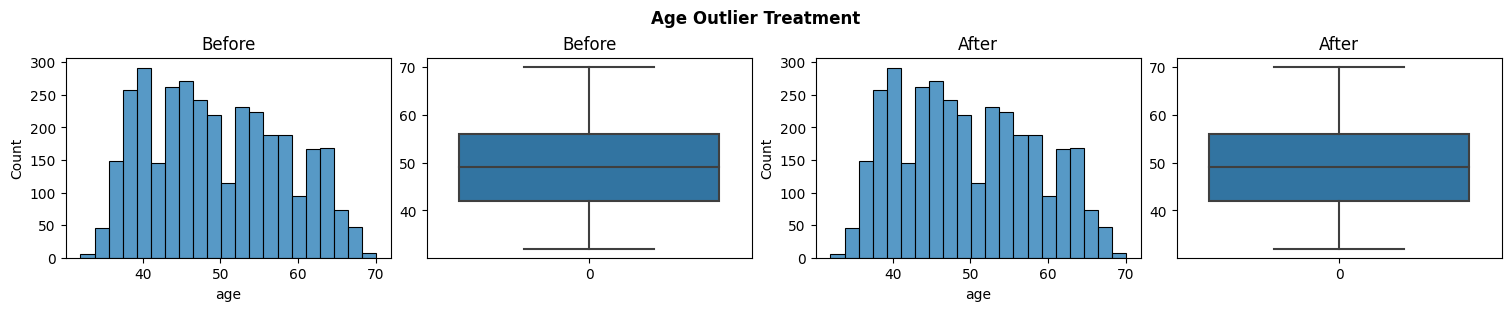

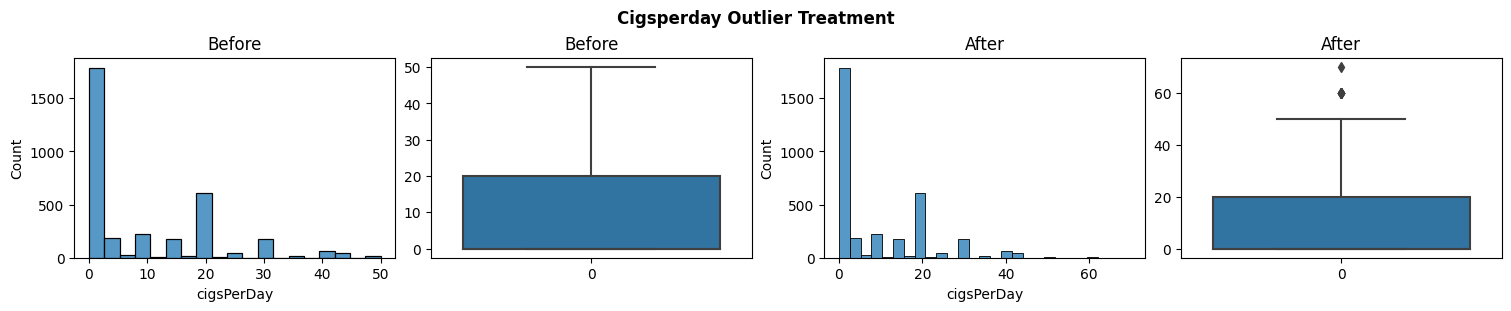

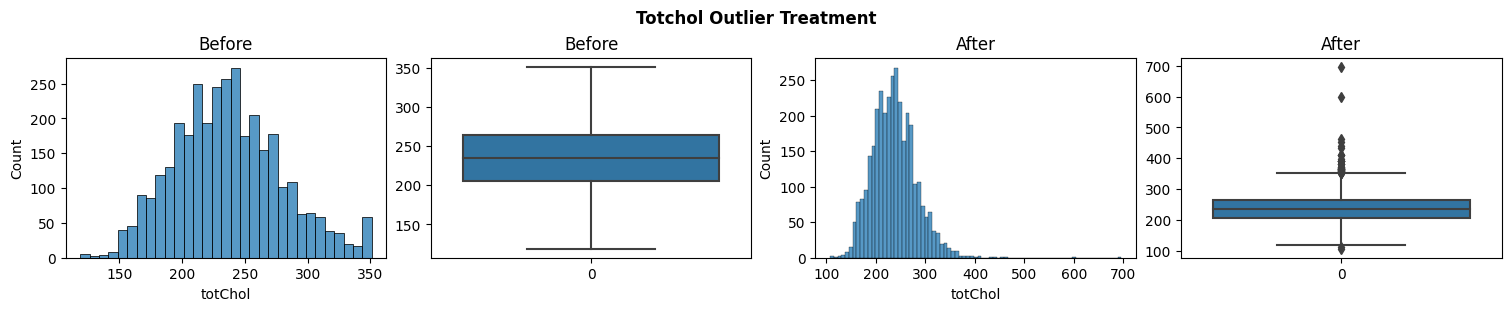

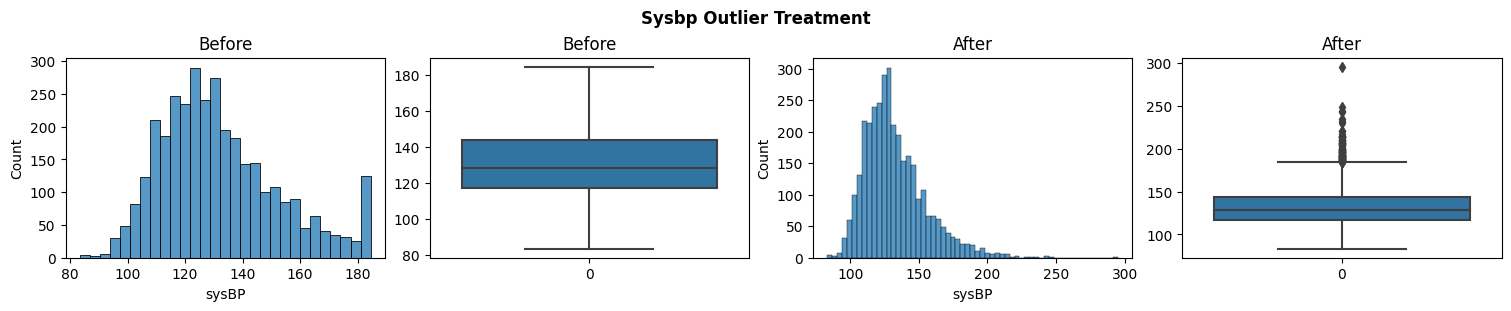

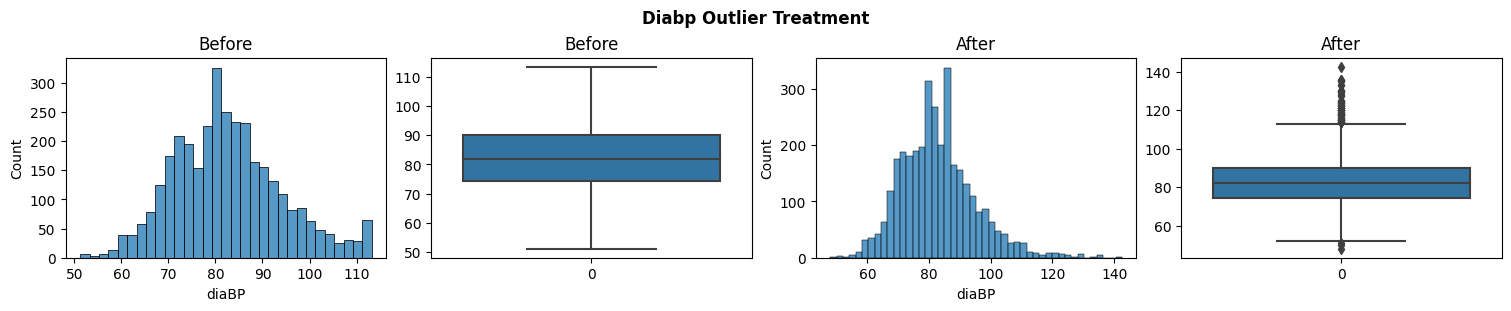

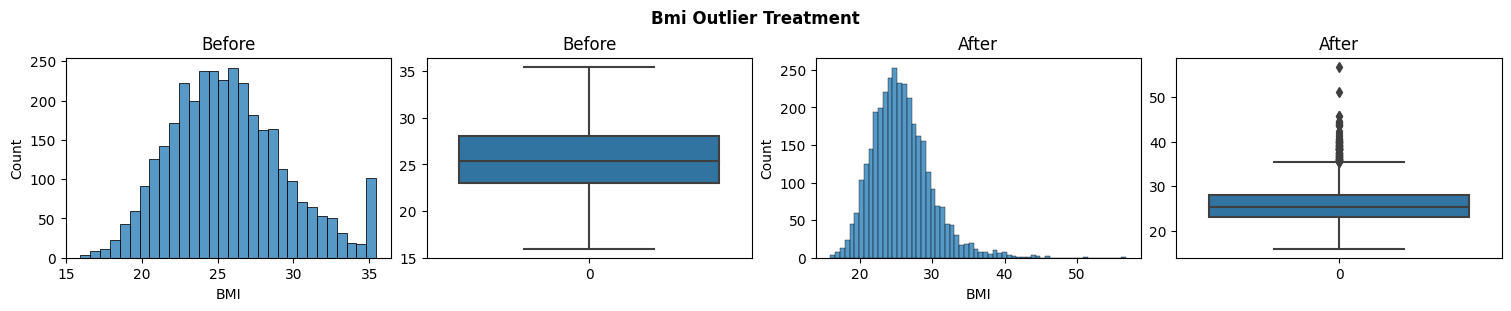

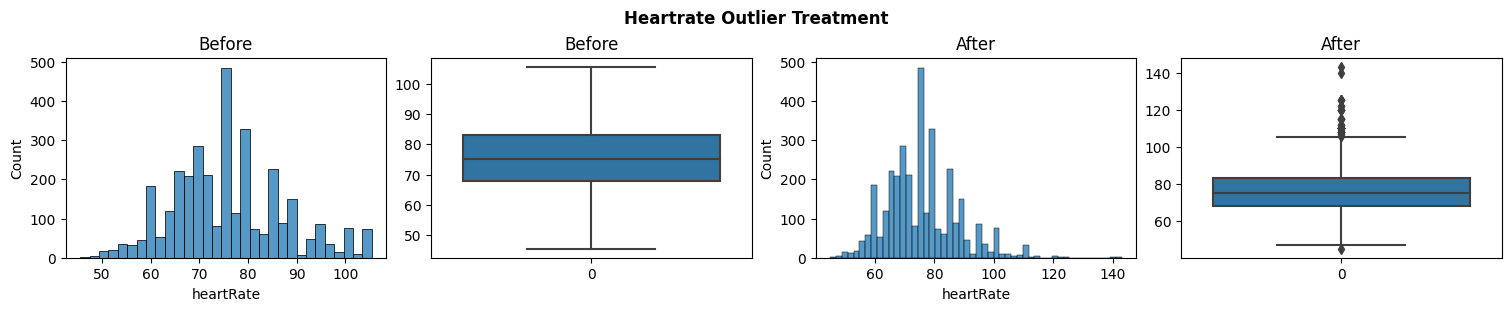

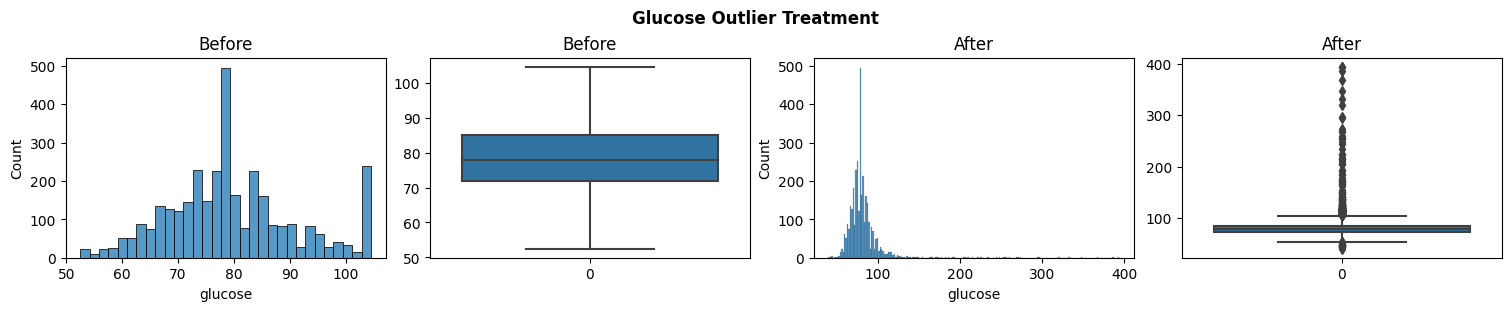

In [20]:
# Create a copy of the DataFrame
DF = df.copy()

# Function to remove outliers using IQR method
def remove_outliers_iqr(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return series.apply(lambda x: np.clip(x, lower_limit, upper_limit))

# Iterate through numeric features
for col in numeric_features:
    # Remove outliers using the IQR method
    df[col] = remove_outliers_iqr(df[col])

# Plotting graphs before and after treating outliers
for col in numeric_features:
    fig, ax = plt.subplots(1, 4, constrained_layout=True)
    fig.set_size_inches(15, 3)

    # Before treating outliers
    sns.histplot(df[col], ax=ax[0]).set(title="Before")
    sns.boxplot(df[col], ax=ax[1]).set(title="Before")

    # After treating outliers
    sns.histplot(DF[col], ax=ax[2]).set(title="After")
    sns.boxplot(DF[col], ax=ax[3]).set(title="After")

    plt.suptitle(f'{col.title()} Outlier Treatment', weight='bold')
    plt.show()


In [21]:
# Label Encoding for 'sex' column
DF['sex'] = DF['sex'].map({'M': 1, 'F': 0})

# Label Encoding for 'is_smoking' column
DF['is_smoking'] = DF['is_smoking'].map({'YES': 1, 'NO': 0})


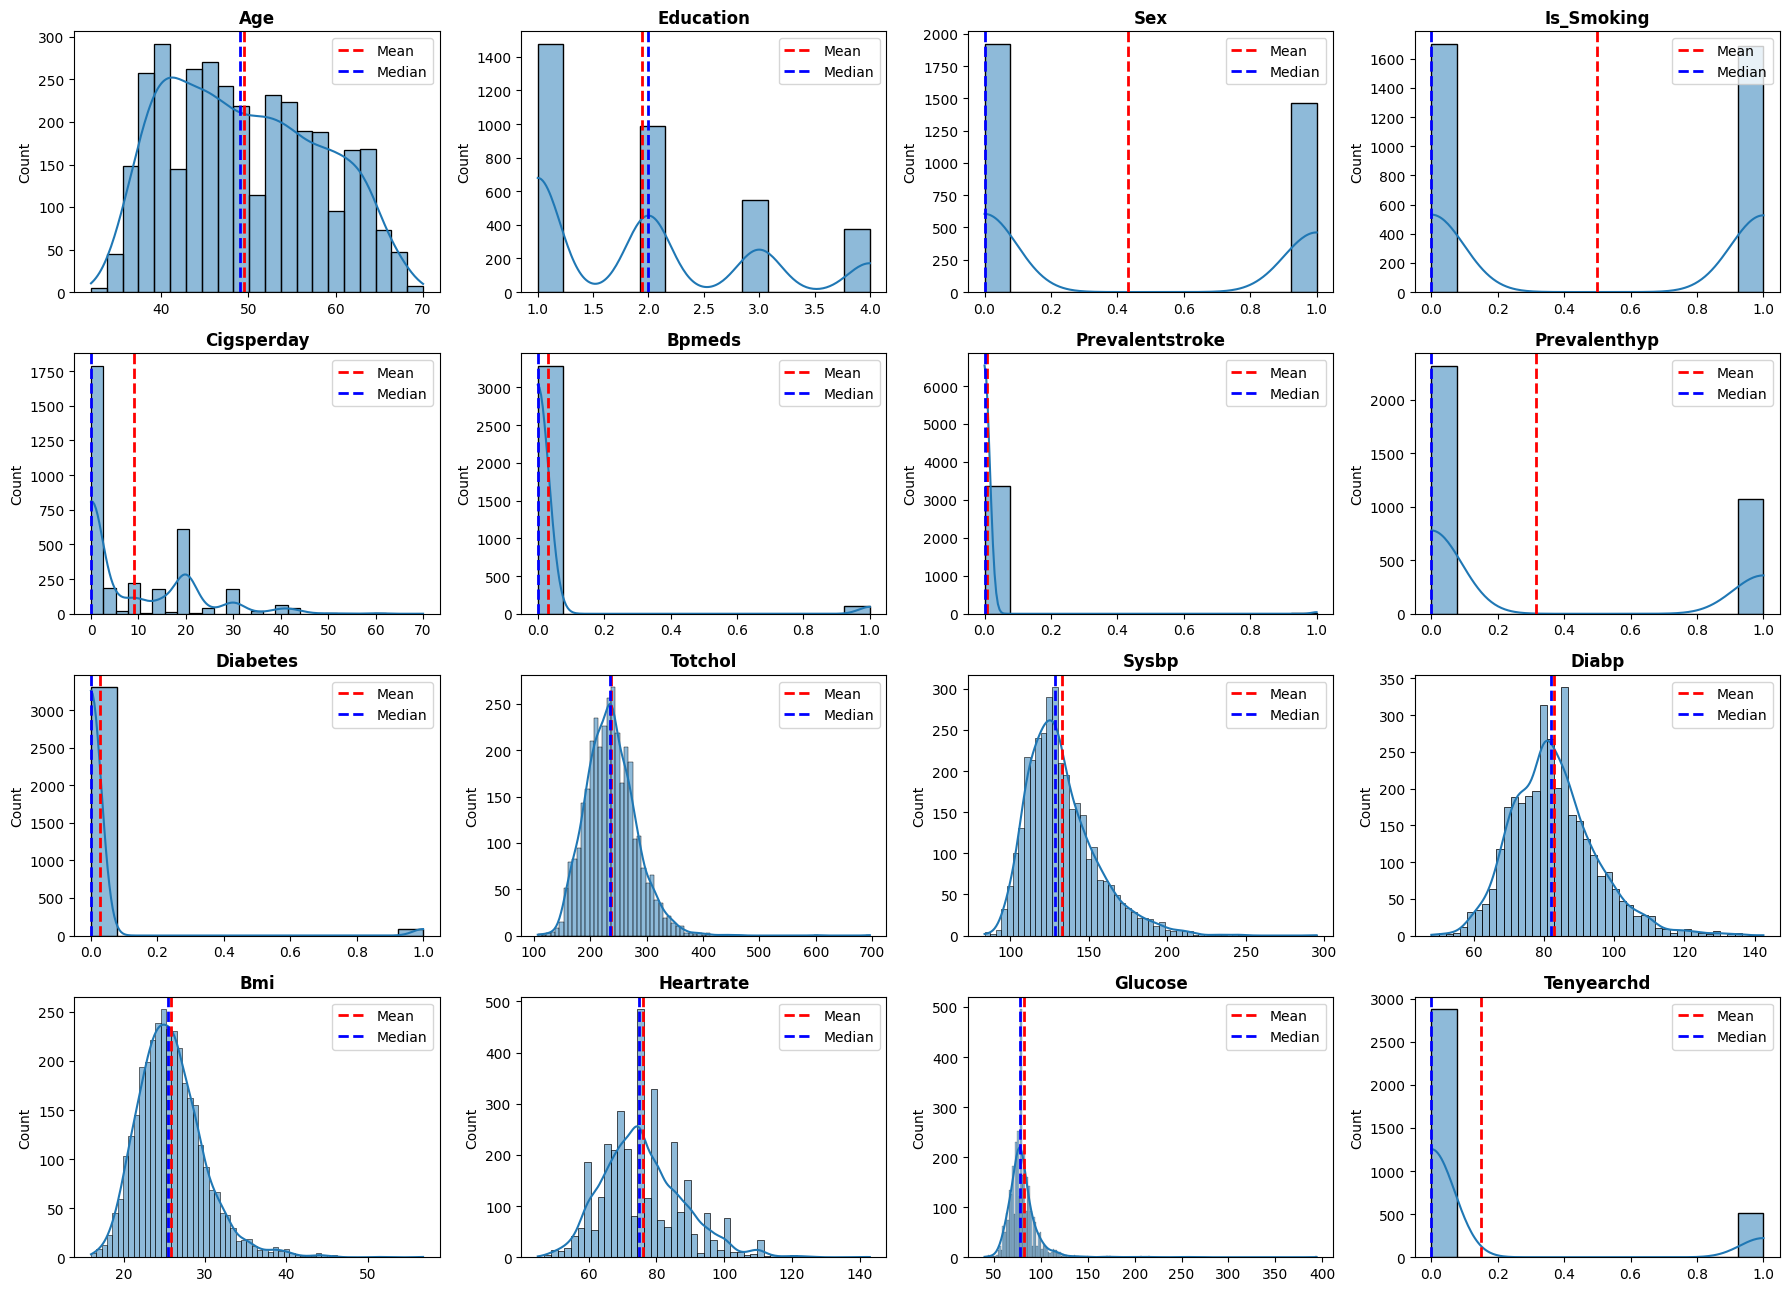

In [22]:
# Visualizing the mean and median
plt.figure(figsize=(18, 16))
for i, column in enumerate(df.columns, 1):
    feature = DF[column]
    ax = plt.subplot(5, 4, i)

    # Creating histograms
    sns.histplot(feature, kde=True)

    # Adding mean and median lines
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2, label='Median')

    # Setting plot title
    plt.title(f'{column.title()}', weight='bold')
    plt.xlabel('')
    plt.legend()
    plt.tight_layout()

# Display the plot
plt.show()


**Observation:**
- After handling outliers, notable shifts in the data distribution are evident. Previously, some features exhibited skewness, but post-outlier treatment, the distributions have approached normality. Consequently, there's no need for additional numerical feature transformation techniques.

## **Correlations**

####**Correlation matrix**

In [23]:
# Computing the correlation matrix
correlation_matrix = DF.corr()
correlation_matrix

age  education       sex  is_smoking  cigsPerDay  \
age              1.000000  -0.170614 -0.041882   -0.210997   -0.191465   
education       -0.170614   1.000000  0.025275    0.030193    0.014078   
sex             -0.041882   0.025275  1.000000    0.215485    0.329308   
is_smoking      -0.210997   0.030193  0.215485    1.000000    0.763273   
cigsPerDay      -0.191465   0.014078  0.329308    0.763273    1.000000   
BPMeds           0.122114  -0.019880 -0.043191   -0.037533   -0.035727   
prevalentStroke  0.059038  -0.031820 -0.011273   -0.043703   -0.041576   
prevalentHyp     0.308826  -0.081925  0.003072   -0.119325   -0.078003   
diabetes         0.107875  -0.051895  0.008853   -0.053333   -0.048114   
totChol          0.272209  -0.021319 -0.070591   -0.046800   -0.025188   
sysBP            0.404845  -0.132202 -0.037369   -0.145721   -0.100348   
diaBP            0.221896  -0.060774  0.058840   -0.124318   -0.068320   
BMI              0.137645  -0.135822  0.087031   -0.172709   -0.099875   
heartRate       -0.002636  -0.039395 -0.118707    0.062152    0.066229   
glucose          0.112395  -0.039303 -0.003016   -0.059353   -0.066374   
TenYearCHD       0.224927  -0.051388  0.084647    0.034143    0.068020   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
age              0.122114         0.059038      0.308826  0.107875  0.272209   
education       -0.019880        -0.031820     -0.081925 -0.051895 -0.021319   
sex             -0.043191        -0.011273      0.003072  0.008853 -0.070591   
is_smoking      -0.037533        -0.043703     -0.119325 -0.053333 -0.046800   
cigsPerDay      -0.035727        -0.041576     -0.078003 -0.048114 -0.025188   
BPMeds           1.000000         0.116183      0.256892  0.070932  0.081144   
prevalentStroke  0.116183         1.000000      0.071652  0.010115 -0.010831   
prevalentHyp     0.256892         0.071652      1.000000  0.082565  0.158741   
diabetes         0.070932         0.010115      0.082565  1.000000  0.059072   
totChol          0.081144        -0.010831      0.158741  0.059072  1.000000   
sysBP            0.260384         0.057568      0.699285  0.124011  0.197933   
diaBP            0.198780         0.047235      0.612897  0.061165  0.153826   
BMI              0.087577         0.017741      0.299723  0.088104  0.113420   
heartRate        0.018107        -0.019183      0.150731  0.039746  0.087087   
glucose          0.061356         0.023662      0.082962  0.609743  0.060886   
TenYearCHD       0.087349         0.068627      0.166544  0.103681  0.093679   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
age              0.404845  0.221896  0.137645  -0.002636  0.112395    0.224927  
education       -0.132202 -0.060774 -0.135822  -0.039395 -0.039303   -0.051388  
sex             -0.037369  0.058840  0.087031  -0.118707 -0.003016    0.084647  
is_smoking      -0.145721 -0.124318 -0.172709   0.062152 -0.059353    0.034143  
cigsPerDay      -0.100348 -0.068320 -0.099875   0.066229 -0.066374    0.068020  
BPMeds           0.260384  0.198780  0.087577   0.018107  0.061356    0.087349  
prevalentStroke  0.057568  0.047235  0.017741  -0.019183  0.023662    0.068627  
prevalentHyp     0.699285  0.612897  0.299723   0.150731  0.082962    0.166544  
diabetes         0.124011  0.061165  0.088104   0.039746  0.609743    0.103681  
totChol          0.197933  0.153826  0.113420   0.087087  0.060886    0.093679  
sysBP            1.000000  0.781908  0.331947   0.178135  0.137832    0.212703  
diaBP            0.781908  1.000000  0.379661   0.174908  0.069097    0.135979  
BMI              0.331947  0.379661  1.000000   0.069518  0.088682    0.066543  
heartRate        0.178135  0.174908  0.069518   1.000000  0.081516    0.020167  
glucose          0.137832  0.069097  0.088682   0.081516  1.000000    0.133472  
TenYearCHD       0.212703  0.135979  0.066543   0.020167  0.133472    1.000000

#### **Pairplot**

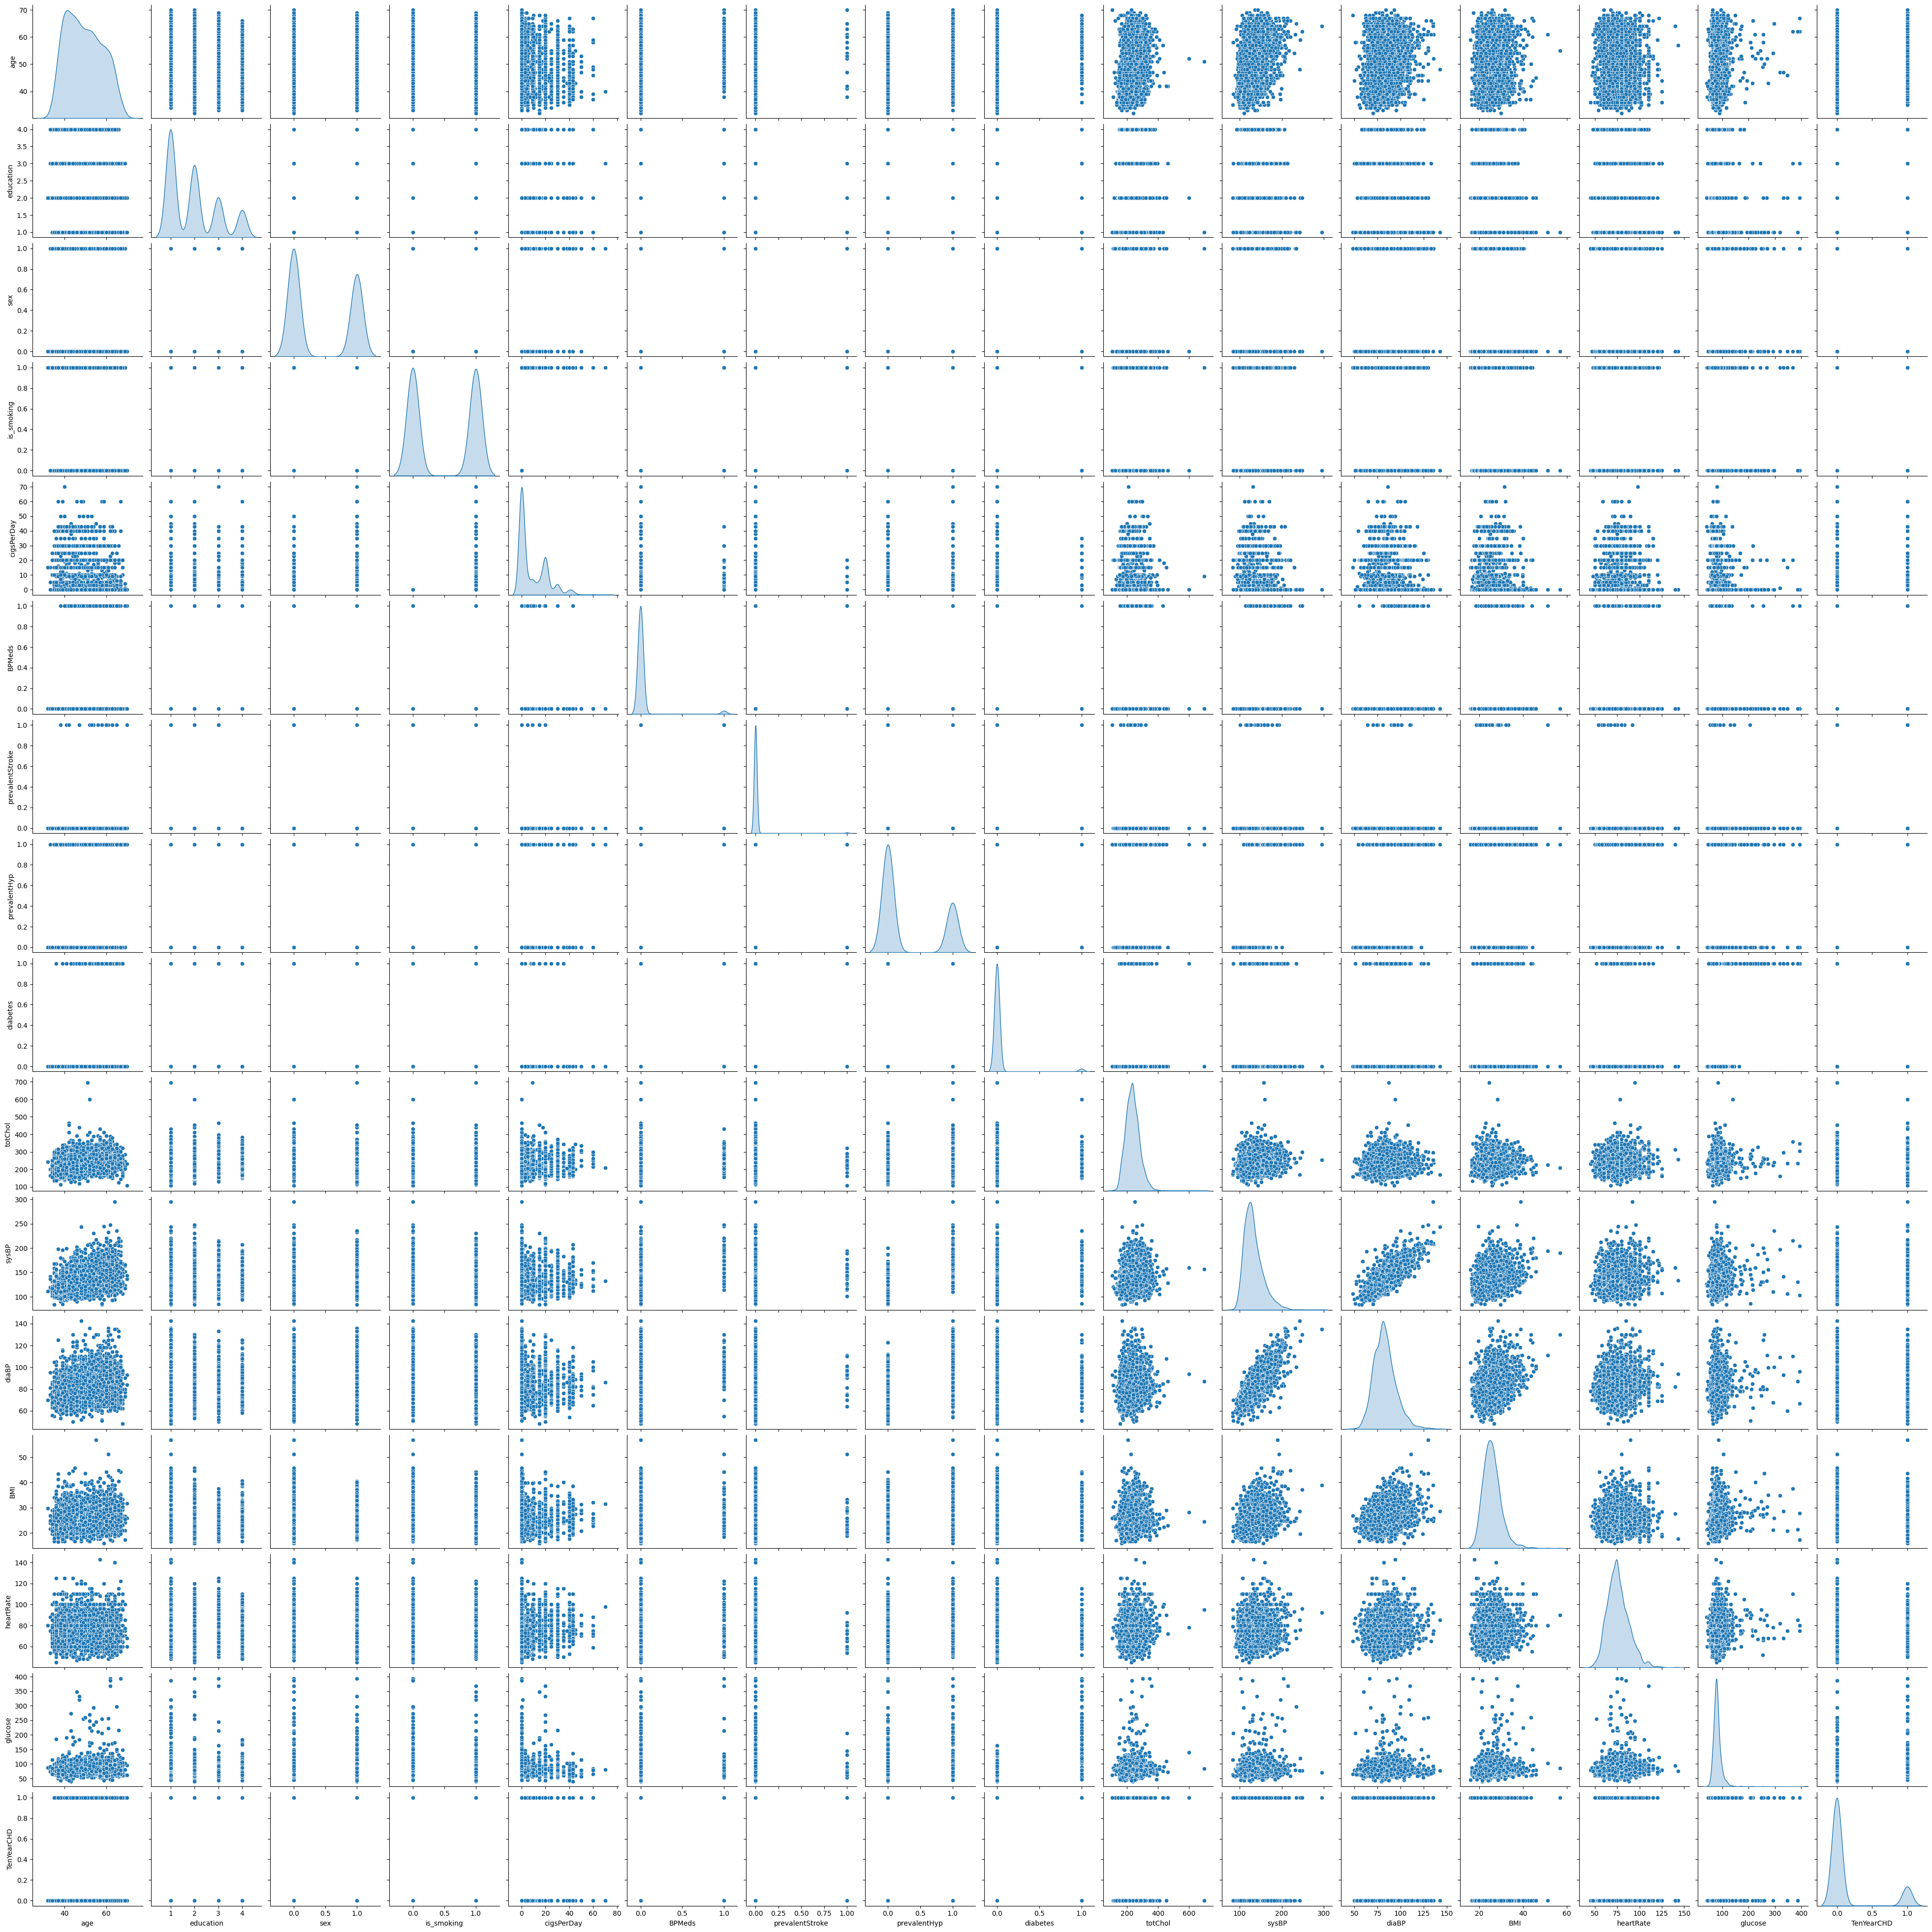

In [24]:
sns.pairplot(DF, diag_kind='kde')
plt.show()

#### **Correlation Heatmap**

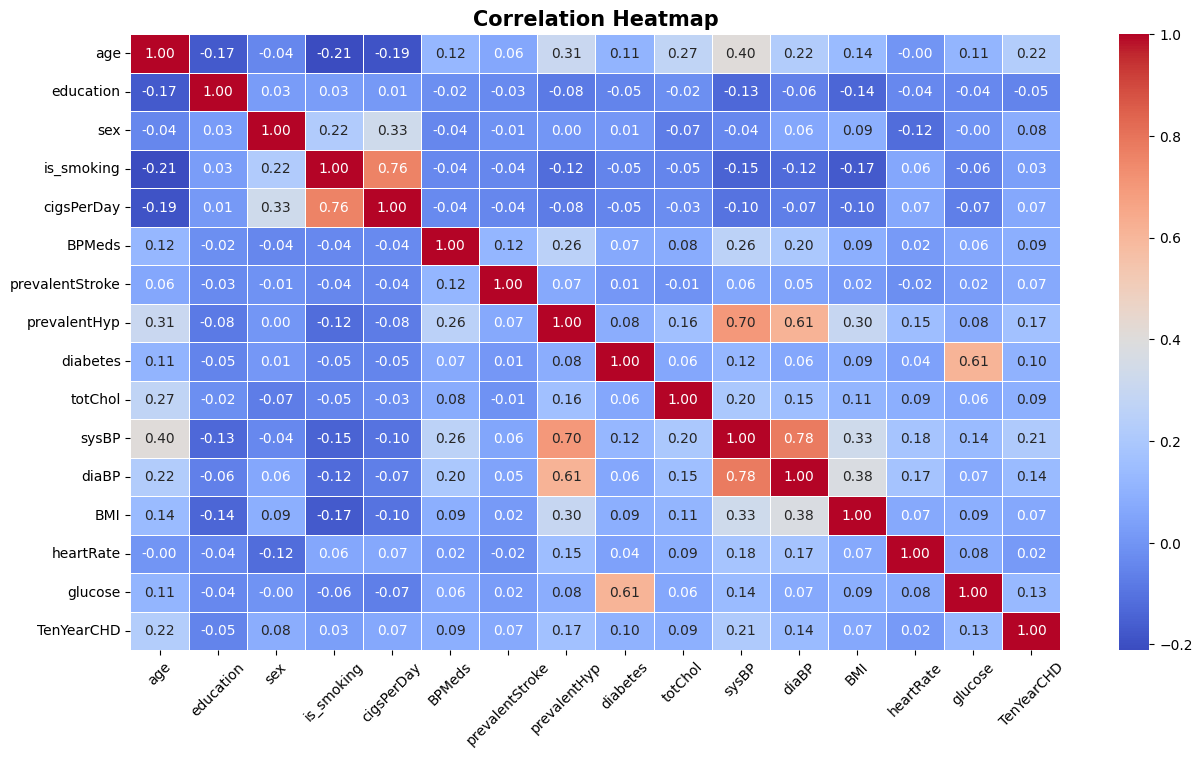

In [25]:
#Ploting Correlation Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap", fontsize=15, weight='bold')
plt.xticks(rotation=45)
plt.show()


* **The heatmap above displays the correlation strengths among all variables in the dataset.**
* **Notably, the variables 'systolic BP' and 'diastolic BP' exhibit a high degree of correlation.**

### **Handling Multicollinearity:**

In [26]:
# Printing Range of Systolic and Diastolic Blood Pressure:
print(DF['sysBP'].min(), DF['sysBP'].max())
print(DF['diaBP'].min(), DF['diaBP'].max())

83.5 295.0
48.0 142.5


In [27]:
# Creating and Analyzing Pulse Pressure:
DF['pulse_pressure'] = DF['sysBP'] - DF['diaBP']
DF.drop(['sysBP', 'diaBP'], axis=1, inplace=True)


<ipython-input-28-04269a3cbd00>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DF['pulse_pressure'])


Text(0.5, 1.0, 'Pulse Pressure Distribution')

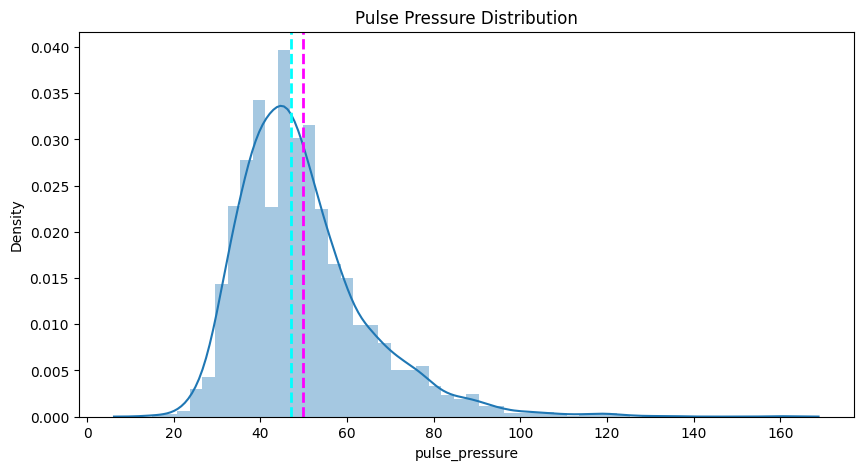

In [28]:
# Visualizing Pulse Pressure Distribution:
plt.figure(figsize=(10, 5))
sns.distplot(DF['pulse_pressure'])
plt.axvline(DF['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(DF['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

<Axes: title={'center': 'Correlation Analysis'}>

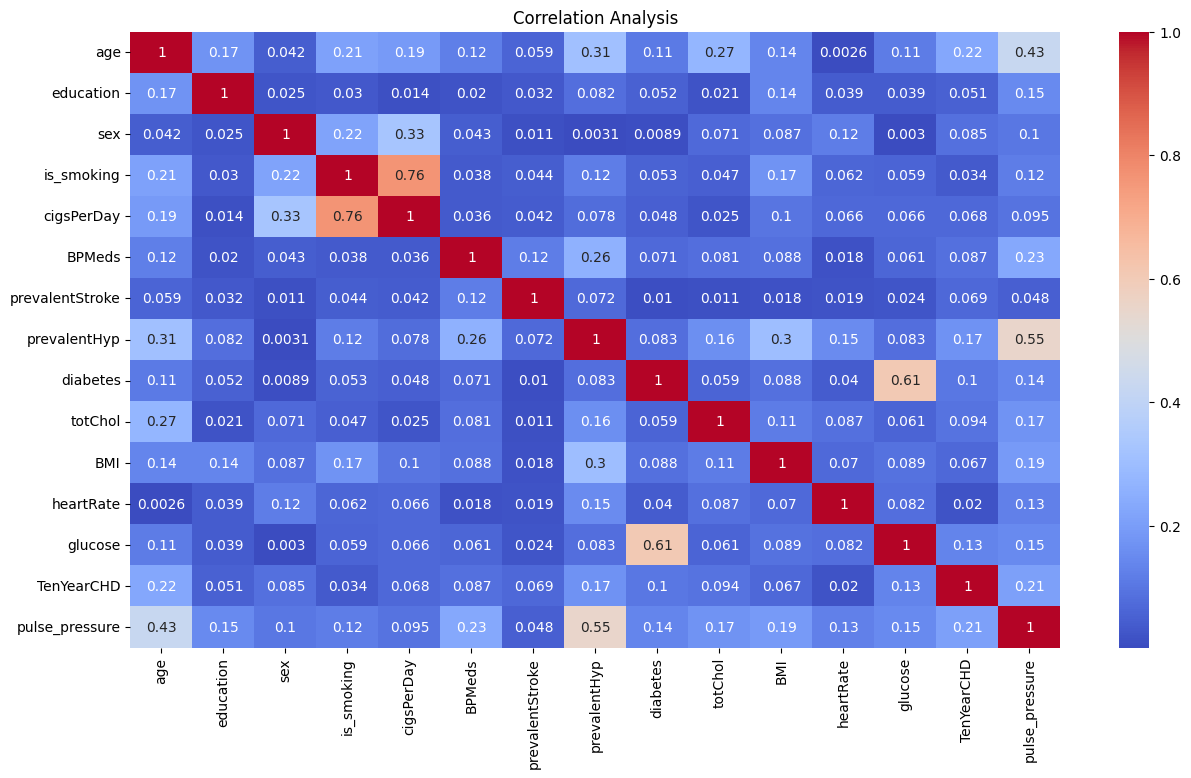

In [29]:

# Updated Correlation Analysis:
plt.figure(figsize=(15, 8))
plt.title('Correlation Analysis')
correlation = DF.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining a function to calculate Variance Inflation Factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)

In [31]:
# Checking VIF for each variable in DF
independent_variables = [i for i in DF.columns if i not in ['TenYearCHD']]
vif_results = calc_vif(DF[independent_variables])
print("VIF for variables in DF:")
print(vif_results)


VIF for variables in DF:
          variables        VIF
0               age  39.725945
1               BMI  36.160754
2         heartRate  34.866978
3           totChol  30.191580
4           glucose  20.283533
5    pulse_pressure  20.029513
6        is_smoking   4.832589
7         education   4.481909
8        cigsPerDay   4.103906
9      prevalentHyp   2.119097
10              sex   2.098556
11         diabetes   1.565484
12           BPMeds   1.132359
13  prevalentStroke   1.026884


In [32]:
# Removing highly correlated variables
highly_correlated_vars = ['TenYearCHD', 'sysBP', 'diaBP', 'glucose', 'BMI', 'totChol', 'heartRate', 'is_smoking']
independent_variables_filtered = [i for i in DF.columns if i not in highly_correlated_vars]
vif_results_filtered = calc_vif(DF[independent_variables_filtered])
print("\nVIF for variables in DF after filtering:")
print(vif_results_filtered)


VIF for variables in DF after filtering:
         variables        VIF
0              age  18.766927
1   pulse_pressure  18.412394
2        education   3.976471
3     prevalentHyp   2.053122
4              sex   1.995156
5       cigsPerDay   1.755041
6           BPMeds   1.127248
7         diabetes   1.049786
8  prevalentStroke   1.025052


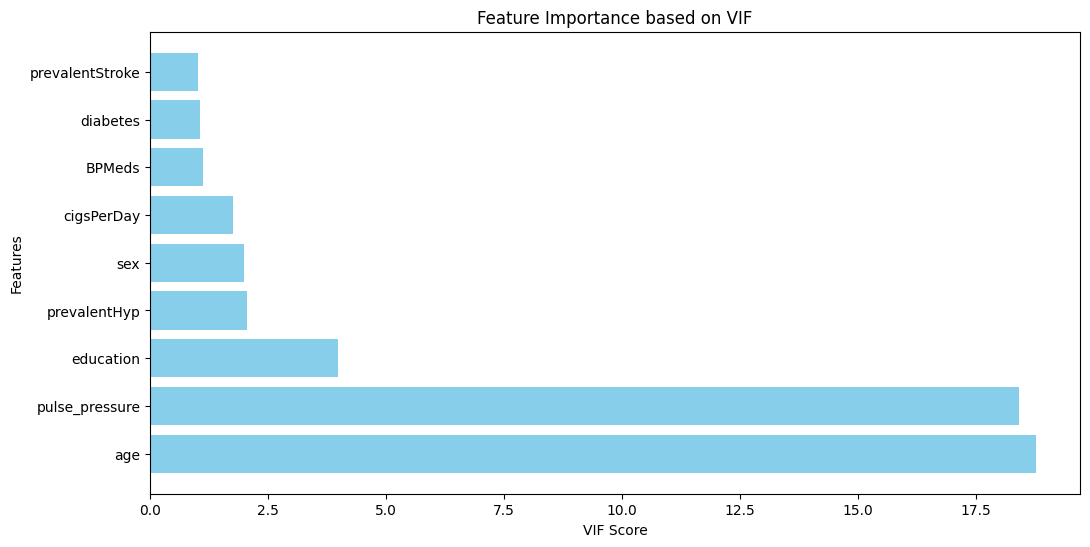

In [33]:
plt.figure(figsize=(12, 6))
plt.barh(vif_results_filtered['variables'], vif_results_filtered['VIF'], color='skyblue')
plt.xlabel('VIF Score')
plt.ylabel('Features')
plt.title('Feature Importance based on VIF')
plt.show()

In [34]:
# Updating the dataset by keeping low VIF variables
dataset = DF[independent_variables_filtered + ['TenYearCHD']]

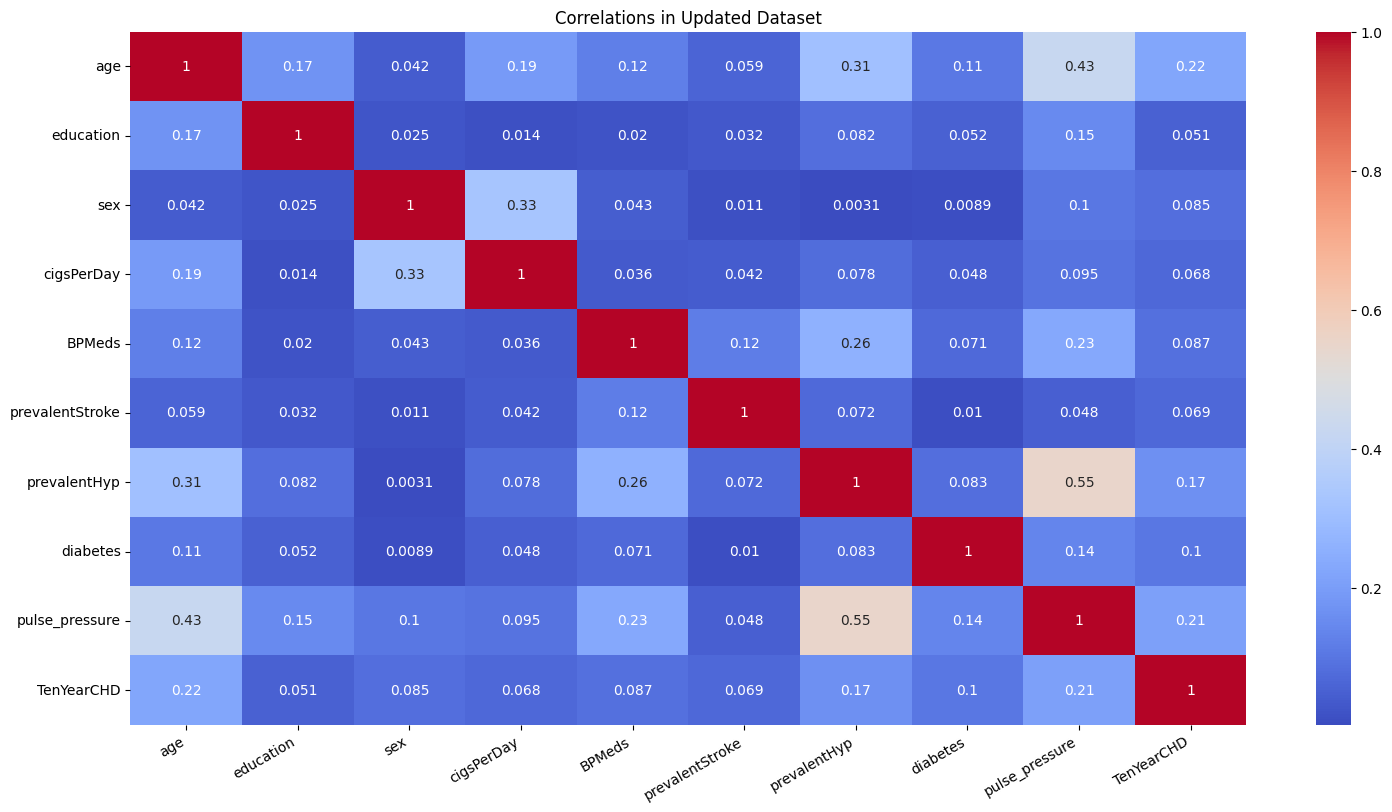

In [35]:
# Checking correlations in the updated dataset
plt.figure(figsize=(18, 9))
sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plt.xticks(rotation=30, horizontalalignment='right')
plt.title('Correlations in Updated Dataset')
plt.show()


- **Patients with elevated pulse pressure, on average, have a higher risk of developing coronary heart disease over a ten-year period.**
- **Based on the plotted graphs, it is evident that the most influential features for predicting the target variable are 'age' and 'pulse_pressure'.**

## **5.Data Pre-processing**

#### **Dependent and Independent Variable Assignment**

In [36]:
# Defining dependent and independent variables
X = dataset.drop(columns='TenYearCHD')     # independent features
y = dataset['TenYearCHD']                  # dependent features

In [37]:
X.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64        2.0    0         3.0     0.0                0             0   
1   36        4.0    1         0.0     0.0                0             1   
2   46        1.0    0        10.0     0.0                0             0   
3   50        1.0    1        20.0     0.0                0             1   
4   64        1.0    0        30.0     0.0                0             0   

   diabetes  pulse_pressure  
0         0            63.0  
1         0            70.0  
2         0            45.0  
3         0            70.0  
4         0            51.5

In [38]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

#### **Handling Imbalance Target Variable**

0    2879
1     511
Name: TenYearCHD, dtype: int64
 


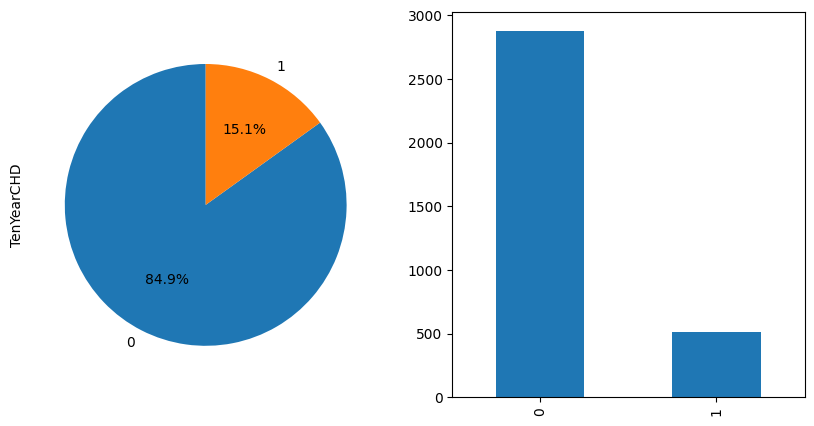

In [39]:
# Dependent Column Value Counts
print(dataset['TenYearCHD'].value_counts())
print(" ")

# Dependent Variable Column Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for percentage
dataset['TenYearCHD'].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=90, ax=ax[0])

# Bar chart for count
dataset['TenYearCHD'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()



- **Our dataset exhibits significant imbalances, requiring corrective measures. To address this issue, we will implement the Synthetic Minority Oversampling Technique (SMOTE) to create a more balanced representation of the data.**

In [40]:
## Handling target class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)
# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 2879, 1: 511})
After Handling Imbalanced class Counter({1: 2879, 0: 2879})


- **Prior to addressing the class imbalance, the dataset was characterized by 2879 instances of class 0 and 511 instances of class 1. After applying the Synthetic Minority Oversampling Technique (SMOTE), both classes have been rebalanced, resulting in 2879 instances for each class.**

#### **Data Preparation**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (4606, 9)
Shape of X_test: (1152, 9)


In [42]:
# Standardize features using StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **6.ML Model Implementation**

### **Algorithm Evaluation Metrics**

#### **Training Data**

In [43]:
# Evaluating Multiple Machine Learning Algorithms on Training Data
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Define a list of algorithms to evaluate
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

Algorithm  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.654581   0.654625  0.654581  0.654581   
1      DecisionTreeClassifier  0.995875   0.995902  0.995875  0.995875   
2        KNeighborsClassifier  0.859531   0.861073  0.859531  0.859349   
3                  GaussianNB  0.628962   0.639649  0.628962  0.622390   
4          AdaBoostClassifier  0.787668   0.789824  0.787668  0.787342   
5  GradientBoostingClassifier  0.821971   0.826849  0.821971  0.821382   
6      RandomForestClassifier  0.995875   0.995877  0.995875  0.995875   
7               XGBClassifier  0.949414   0.950008  0.949414  0.949403   
8                         SVC  0.712332   0.713189  0.712332  0.711951   

   Building Time (s)  
0           1.787632  
1           0.087382  
2           0.665823  
3           0.016432  
4           0.305645  
5           0.592954  
6           0.707376  
7           0.128540  
8           1.747344

#### **Test Data**

In [44]:
# Evaluating Multiple Machine Learning Algorithms on Test Data

results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test


Algorithm  Accuracy  Precision    Recall  F1-score
0          LogisticRegression  0.658854   0.659059  0.658854  0.658897
1      DecisionTreeClassifier  0.832465   0.833374  0.832465  0.832462
2        KNeighborsClassifier  0.782118   0.787329  0.782118  0.781554
3                  GaussianNB  0.611979   0.619834  0.611979  0.602060
4          AdaBoostClassifier  0.799479   0.800685  0.799479  0.799063
5  GradientBoostingClassifier  0.809896   0.812752  0.809896  0.809174
6      RandomForestClassifier  0.872396   0.872391  0.872396  0.872387
7               XGBClassifier  0.852431   0.852514  0.852431  0.852380
8                         SVC  0.677083   0.680986  0.677083  0.676218

#### **Visulisation on training data**

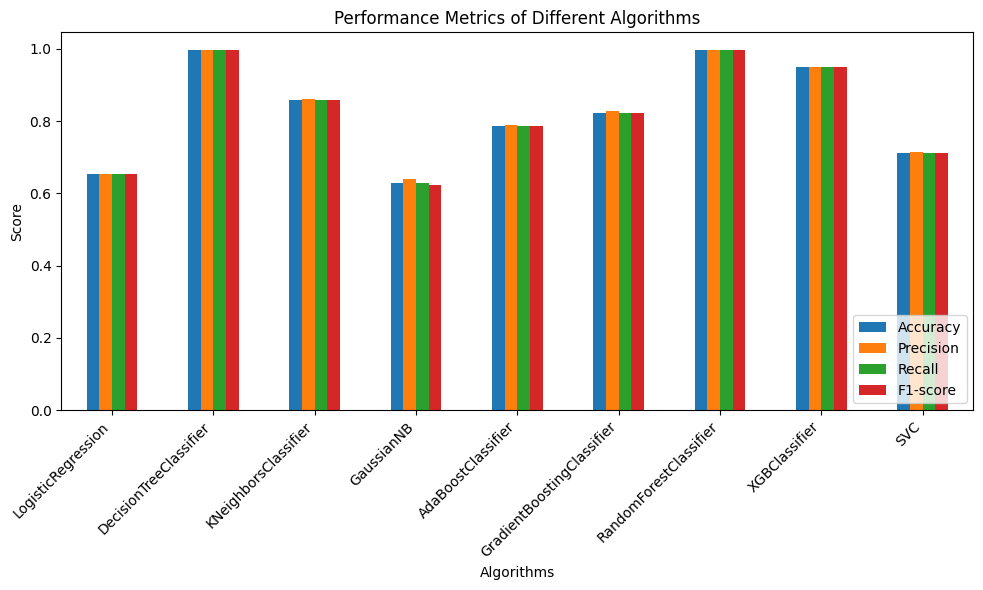

In [45]:

# Given data
algorithms = ["LogisticRegression", "DecisionTreeClassifier", "KNeighborsClassifier",
              "GaussianNB", "AdaBoostClassifier", "GradientBoostingClassifier",
              "RandomForestClassifier", "XGBClassifier", "SVC"]
accuracy = [0.654581, 0.995875, 0.859531, 0.628962, 0.787668, 0.821971, 0.995875, 0.949414, 0.712332]
precision = [0.654625, 0.995902, 0.861073, 0.639649, 0.789824, 0.826849, 0.995877, 0.950008, 0.713189]
recall = [0.654581, 0.995875, 0.859531, 0.628962, 0.787668, 0.821971, 0.995875, 0.949414, 0.712332]
f1_score = [0.654581, 0.995875, 0.859349, 0.622390, 0.787342, 0.821382, 0.995875, 0.949403, 0.711951]

# Create a DataFrame for the given data
dat = {
    "Algorithm": algorithms,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1_score
}
traindf = pd.DataFrame(dat)

# Set the Algorithm column as the index for plotting
traindf.set_index("Algorithm", inplace=True)

# Plotting
traindf.plot(kind='bar', figsize=(10, 6))
plt.title("Performance Metrics of Different Algorithms")
plt.ylabel("Score")
plt.xlabel("Algorithms")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### **Visulisation on test data**

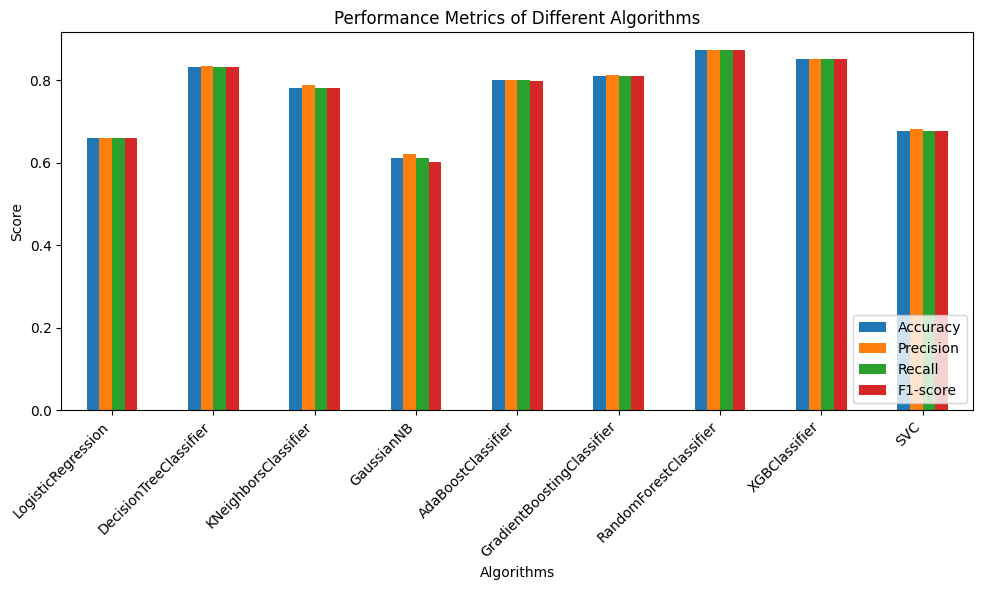

In [46]:
# Given data
algorithms = ["LogisticRegression", "DecisionTreeClassifier", "KNeighborsClassifier",
              "GaussianNB", "AdaBoostClassifier", "GradientBoostingClassifier",
              "RandomForestClassifier", "XGBClassifier", "SVC"]
accuracy = [0.658854, 0.832465, 0.782118, 0.611979, 0.799479, 0.809896, 0.872396, 0.852431, 0.677083]
precision = [0.659059, 0.833374, 0.787329, 0.619834, 0.800685, 0.812752, 0.872391, 0.852514, 0.680986]
recall = [0.658854, 0.832465, 0.782118, 0.611979, 0.799479, 0.809896, 0.872396, 0.852431, 0.677083]
f1_score = [0.658897, 0.832462, 0.781554, 0.602060, 0.799063, 0.809174, 0.872387, 0.852380, 0.676218]

# Create a DataFrame for the given data
import pandas as pd
data = {
    "Algorithm": algorithms,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1_score
}
df = pd.DataFrame(data)

# Set the Algorithm column as the index for plotting
df.set_index("Algorithm", inplace=True)

# Plotting
df.plot(kind='bar', figsize=(10, 6))
plt.title("Performance Metrics of Different Algorithms")
plt.ylabel("Score")
plt.xlabel("Algorithms")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()




**Observations:**

- **DecisionTreeClassifier**, **RandomForestClassifier**, and **XGBClassifier** achieved almost perfect accuracy, precision, recall, and F1-score on the training data, suggesting potential overfitting.
- **RandomForestClassifier** demonstrated the best generalization, with high accuracy, precision, recall, and F1-score on both training and test data.
- **LogisticRegression**, **AdaBoostClassifier**, and **GradientBoostingClassifier** performed reasonably well on the test data, indicating good balance between bias and variance.
- **SVC** took the longest time to build, likely due to its complexity, while **DecisionTreeClassifier** and **GaussianNB** were the fastest models to build.

### **Model Evaluation and ROC Analysis**

Evaluating LogisticRegression...

Training Set Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      2290
           1       0.66      0.65      0.65      2316

    accuracy                           0.65      4606
   macro avg       0.65      0.65      0.65      4606
weighted avg       0.65      0.65      0.65      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       589
           1       0.65      0.66      0.65       563

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152

Training Set Confusion Matrix:
[[1508  782]
 [ 809 1507]]
Test Set Confusion Matrix:
[[387 202]
 [191 372]]


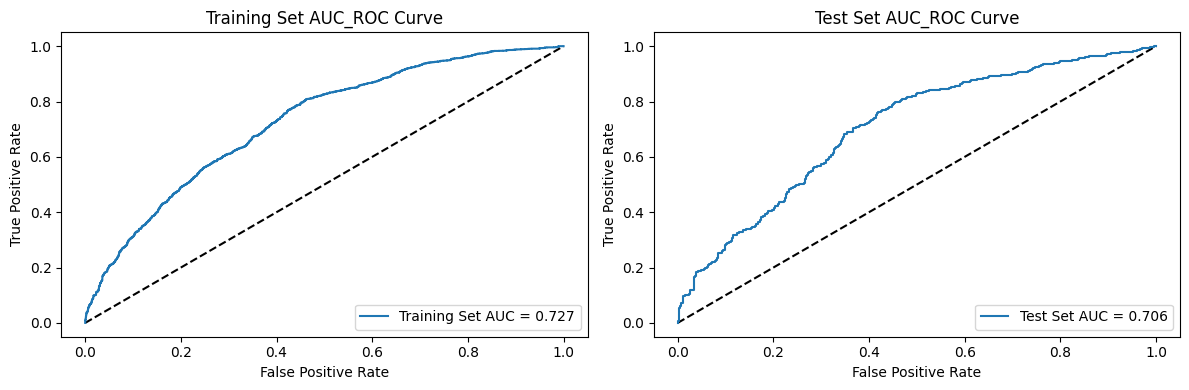

Evaluating DecisionTreeClassifier...

Training Set Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2290
           1       1.00      0.99      1.00      2316

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       589
           1       0.81      0.85      0.83       563

    accuracy                           0.83      1152
   macro avg       0.83      0.83      0.83      1152
weighted avg       0.83      0.83      0.83      1152

Training Set Confusion Matrix:
[[2289    1]
 [  18 2298]]
Test Set Confusion Matrix:
[[479 110]
 [ 83 480]]


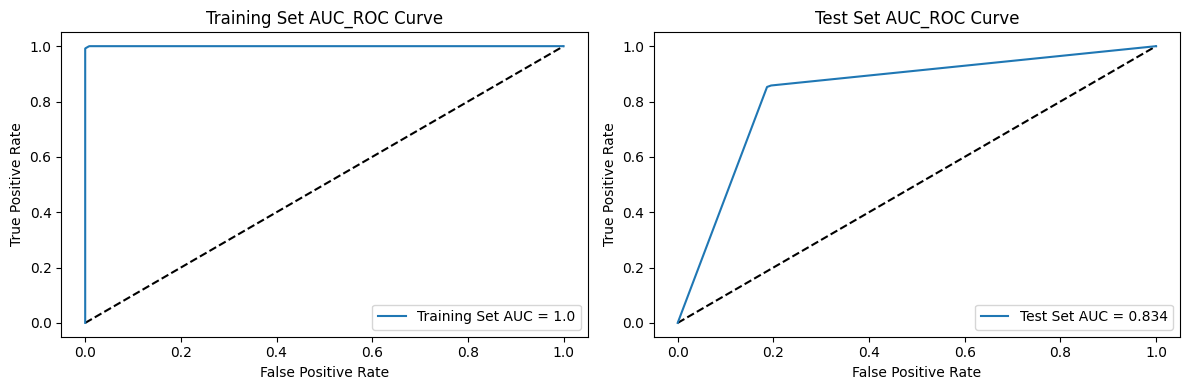

Evaluating KNeighborsClassifier...

Training Set Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2290
           1       0.84      0.89      0.86      2316

    accuracy                           0.86      4606
   macro avg       0.86      0.86      0.86      4606
weighted avg       0.86      0.86      0.86      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       589
           1       0.75      0.84      0.79       563

    accuracy                           0.78      1152
   macro avg       0.79      0.78      0.78      1152
weighted avg       0.79      0.78      0.78      1152

Training Set Confusion Matrix:
[[1890  400]
 [ 247 2069]]
Test Set Confusion Matrix:
[[427 162]
 [ 89 474]]


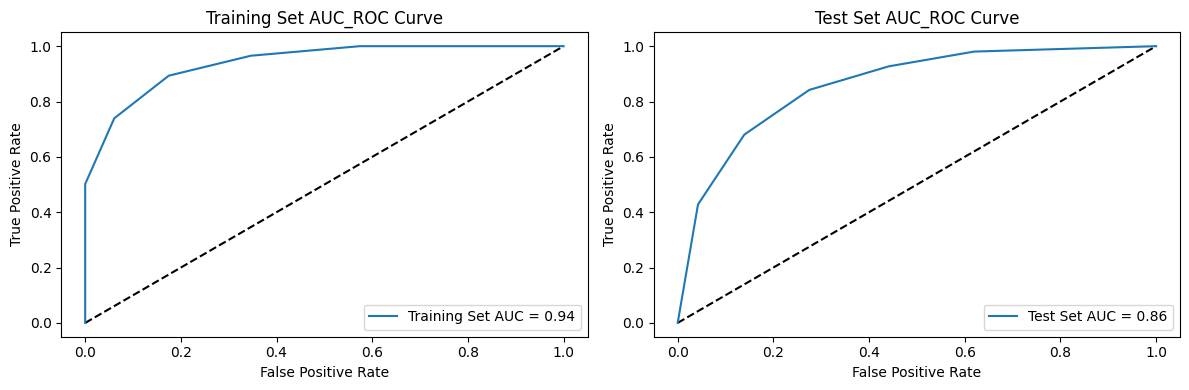

Evaluating GaussianNB...

Training Set Report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      2290
           1       0.68      0.50      0.57      2316

    accuracy                           0.63      4606
   macro avg       0.64      0.63      0.62      4606
weighted avg       0.64      0.63      0.62      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.59      0.76      0.67       589
           1       0.65      0.45      0.53       563

    accuracy                           0.61      1152
   macro avg       0.62      0.61      0.60      1152
weighted avg       0.62      0.61      0.60      1152

Training Set Confusion Matrix:
[[1746  544]
 [1165 1151]]
Test Set Confusion Matrix:
[[450 139]
 [308 255]]


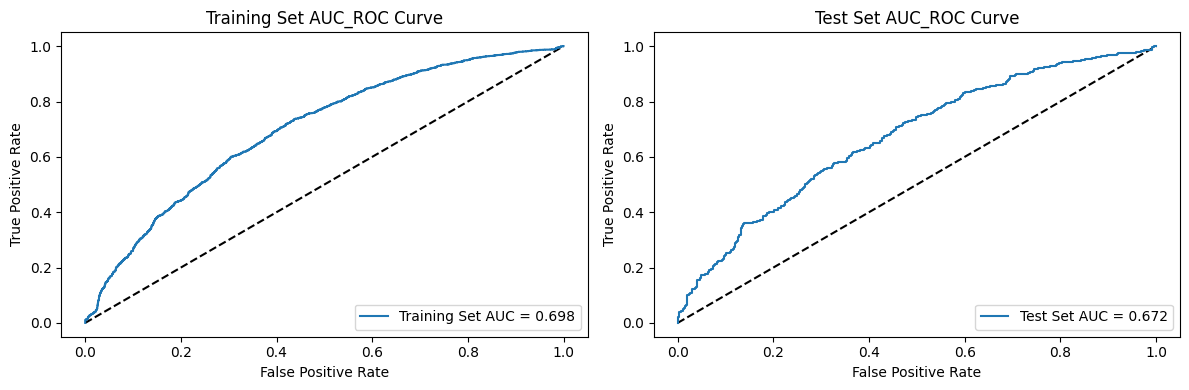

Evaluating AdaBoostClassifier...

Training Set Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      2290
           1       0.82      0.75      0.78      2316

    accuracy                           0.79      4606
   macro avg       0.79      0.79      0.79      4606
weighted avg       0.79      0.79      0.79      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       589
           1       0.82      0.76      0.79       563

    accuracy                           0.80      1152
   macro avg       0.80      0.80      0.80      1152
weighted avg       0.80      0.80      0.80      1152

Training Set Confusion Matrix:
[[1898  392]
 [ 586 1730]]
Test Set Confusion Matrix:
[[494  95]
 [136 427]]


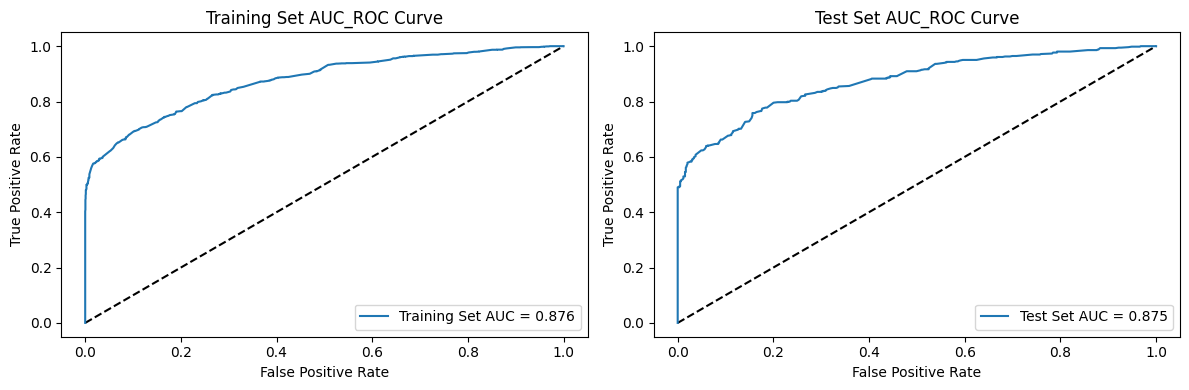

Evaluating GradientBoostingClassifier...

Training Set Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2290
           1       0.87      0.76      0.81      2316

    accuracy                           0.82      4606
   macro avg       0.83      0.82      0.82      4606
weighted avg       0.83      0.82      0.82      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       589
           1       0.84      0.75      0.79       563

    accuracy                           0.81      1152
   macro avg       0.81      0.81      0.81      1152
weighted avg       0.81      0.81      0.81      1152

Training Set Confusion Matrix:
[[2019  271]
 [ 549 1767]]
Test Set Confusion Matrix:
[[509  80]
 [139 424]]


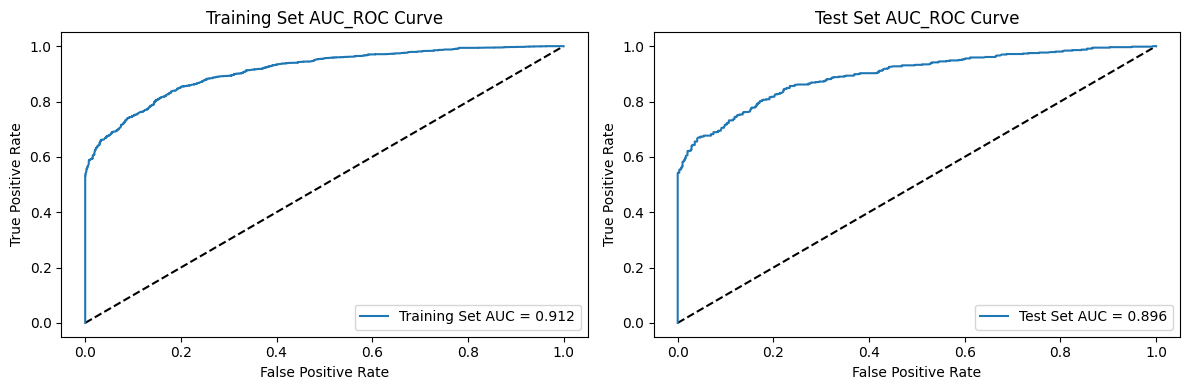

Evaluating RandomForestClassifier...

Training Set Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2290
           1       0.99      1.00      1.00      2316

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       589
           1       0.87      0.87      0.87       563

    accuracy                           0.87      1152
   macro avg       0.87      0.87      0.87      1152
weighted avg       0.87      0.87      0.87      1152

Training Set Confusion Matrix:
[[2278   12]
 [   7 2309]]
Test Set Confusion Matrix:
[[517  72]
 [ 75 488]]


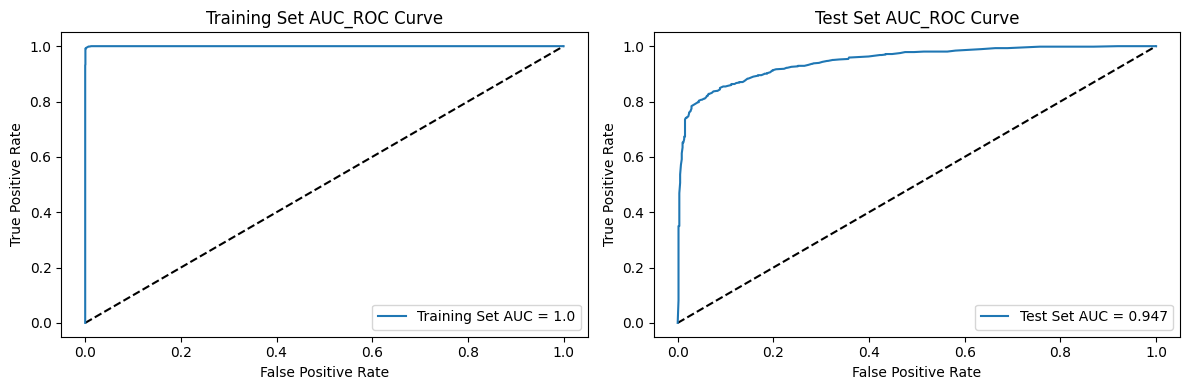

Evaluating XGBClassifier...

Training Set Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2290
           1       0.97      0.93      0.95      2316

    accuracy                           0.95      4606
   macro avg       0.95      0.95      0.95      4606
weighted avg       0.95      0.95      0.95      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       589
           1       0.86      0.84      0.85       563

    accuracy                           0.85      1152
   macro avg       0.85      0.85      0.85      1152
weighted avg       0.85      0.85      0.85      1152

Training Set Confusion Matrix:
[[2215   75]
 [ 158 2158]]
Test Set Confusion Matrix:
[[510  79]
 [ 91 472]]


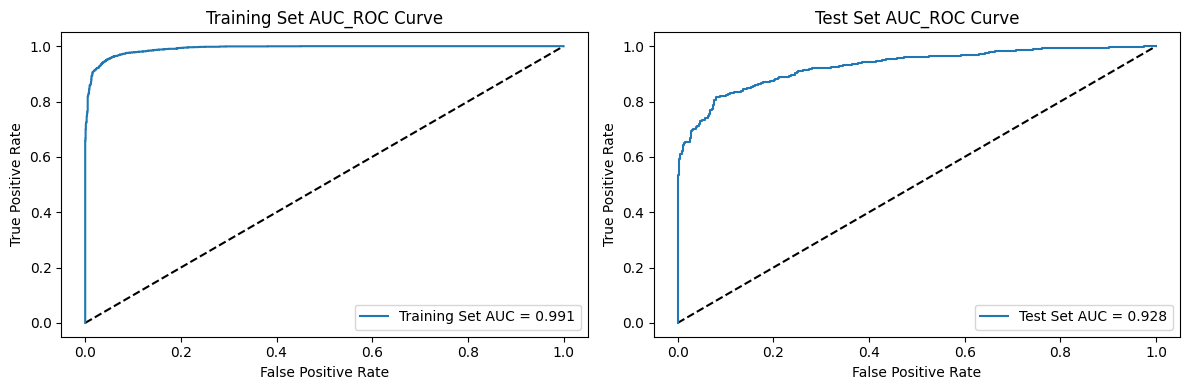

Evaluating SVC...

Training Set Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      2290
           1       0.70      0.75      0.72      2316

    accuracy                           0.71      4606
   macro avg       0.71      0.71      0.71      4606
weighted avg       0.71      0.71      0.71      4606

Test Set Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       589
           1       0.65      0.74      0.69       563

    accuracy                           0.68      1152
   macro avg       0.68      0.68      0.68      1152
weighted avg       0.68      0.68      0.68      1152

Training Set Confusion Matrix:
[[1550  740]
 [ 585 1731]]
Test Set Confusion Matrix:
[[366 223]
 [149 414]]


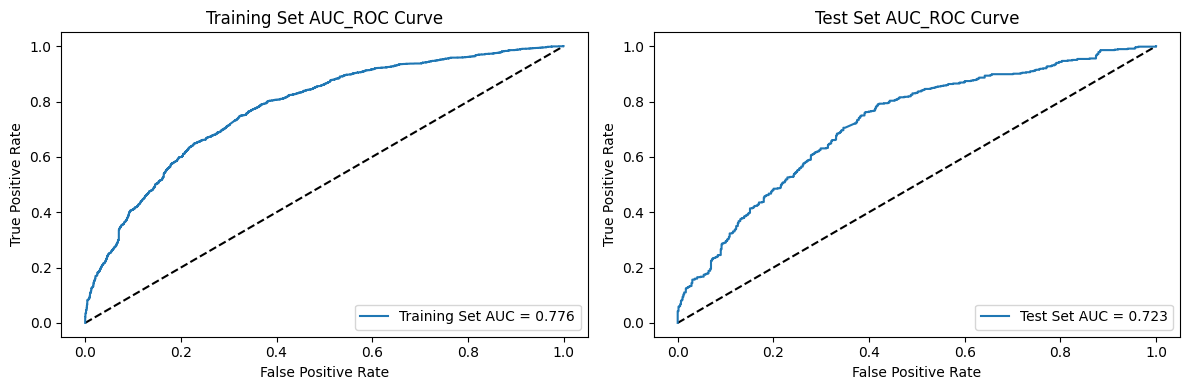

In [47]:


# Define a list of algorithms to evaluate
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(probability=True, random_state=42)  # Set probability=True for SVM
]

# Iterate over algorithms and analyze each model
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    print(f"Evaluating {algorithm_name}...\n")

    # Fitting the model
    algorithm.fit(X_train, y_train)

    # Getting required metrics for training data
    train_pred = algorithm.predict(X_train)
    if hasattr(algorithm, "predict_proba"):
        train_pred_proba = algorithm.predict_proba(X_train)[:, 1]
    else:
        train_pred_proba = algorithm.decision_function(X_train)
    train_fpr, train_tpr, _ = roc_curve(y_train, train_pred_proba)

    # Getting required metrics for test data
    test_pred = algorithm.predict(X_test)
    if hasattr(algorithm, "predict_proba"):
        test_pred_proba = algorithm.predict_proba(X_test)[:, 1]
    else:
        test_pred_proba = algorithm.decision_function(X_test)
    test_fpr, test_tpr, _ = roc_curve(y_test, test_pred_proba)

    # Classification report for training data
    print("Training Set Report:")
    print(classification_report(y_train, train_pred))

    # Classification report for test data
    print("Test Set Report:")
    print(classification_report(y_test, test_pred))

    # Confusion Matrix for training data
    print("Training Set Confusion Matrix:")
    print(confusion_matrix(y_train, train_pred))

    # Confusion Matrix for test data
    print("Test Set Confusion Matrix:")
    print(confusion_matrix(y_test, test_pred))

    # AUC_ROC Curve for training data
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(train_fpr, train_tpr, label=f'Training Set AUC = {np.round(auc(train_fpr, train_tpr), 3)}')
    plt.legend(loc=4)
    plt.title('Training Set AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # AUC_ROC Curve for test data
    plt.subplot(1, 2, 2)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(test_fpr, test_tpr, label=f'Test Set AUC = {np.round(auc(test_fpr, test_tpr), 3)}')
    plt.legend(loc=4)
    plt.title('Test Set AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.tight_layout()
    plt.show()


- **AUC-ROC Curve:**
  - **DecisionTreeClassifier**, **RandomForestClassifier**, and **XGBClassifier** achieved almost perfect AUC (Area Under the Curve) values on both training and test data, indicating excellent performance in distinguishing between classes.
  - **RandomForestClassifier** demonstrated consistent and high AUC values on both training and test sets, suggesting robustness in class separation.
  - **LogisticRegression**, **AdaBoostClassifier**, and **GradientBoostingClassifier** showed good AUC values, indicating a strong ability to discriminate between classes, although slightly lower than the top-performing models.
  - **SVC** had a moderate AUC value, suggesting acceptable discrimination ability but with room for improvement compared to other models.

- **summary**
   - the AUC-ROC curves reinforce the performance trends observed earlier, highlighting the models' ability to correctly classify instances across different thresholds. **RandomForestClassifier** stands out as the most reliable model based on both classification metrics and AUC-ROC evaluation.

# **7.Conclusion**



1. **Demographic and Health Trends:**
   - The dataset contained a mix of demographic and health-related features, including age, gender, smoking habits, medical history, and vital signs.
   - Imbalances were identified in categories such as education level, gender distribution, and medical history, with potential implications for model performance.

2. **Data Imbalance:**
   - There was a significant imbalance in the target variable, TenYearCHD, with a smaller proportion of individuals at risk of developing CHD.
   - To address this imbalance, the Synthetic Minority Oversampling Technique (SMOTE) was applied, resulting in a more balanced dataset for modeling.

3. **Feature Analysis:**
   - Age emerged as a significant predictor, showing a clear association with the presence of heart disease.
   - Several numerical features exhibited positive relationships with the target variable, indicating higher values were correlated with an increased risk of CHD.
   - Pulse pressure was identified as a notable predictor, with elevated values indicating a higher risk of developing CHD.

4. **Machine Learning Model Implementation:**
   - Several machine learning models were trained and evaluated, including Decision Tree Classifier, Random Forest Classifier, XGBoost Classifier, Logistic Regression, AdaBoost Classifier, Gradient Boosting Classifier, Support Vector Classifier (SVC), and Gaussian Naive Bayes.
   - RandomForestClassifier emerged as the top-performing model, demonstrating excellent accuracy, precision, recall, and F1-score on both the training and test datasets.
   - AUC-ROC curves confirmed the models' ability to discriminate between classes, with RandomForestClassifier exhibiting consistent and high AUC values, indicating strong performance in class separation.

###**Conclusion:**

In conclusion, the project successfully addressed data cleaning challenges, imbalances in the dataset, and outliers, ensuring the dataset was robust and suitable for machine learning analysis. Through EDA, critical insights were gained into the relationships between various features and the likelihood of developing coronary heart disease. Machine learning models were carefully evaluated, with RandomForestClassifier standing out as the most reliable model for predicting CHD, offering a balance between accuracy and generalization.

The findings from this project can be utilized in healthcare settings to identify individuals at higher risk of developing heart disease, enabling proactive interventions and personalized healthcare strategies. The project's methodologies, including data cleaning techniques, feature analysis, and model evaluation, serve as a valuable foundation for similar predictive modeling tasks in the field of healthcare and beyond.

###**Future Work:**

While the current project provides valuable insights into predicting coronary heart disease (CHD) and establishes a robust model, there are several avenues for future work and improvements:

1. **Feature Engineering:**
   - Explore additional feature engineering techniques to create new meaningful features. Domain knowledge and medical expertise could guide the creation of composite features that might enhance the model's predictive power.
   - Investigate interactions between different features and assess their impact on the risk of CHD.

2. **Data Collection:**
   - Consider expanding the dataset with more diverse and comprehensive variables. Incorporating genetic, lifestyle, and environmental factors could provide a more holistic view of a person's risk for CHD.
   - Regularly update the dataset with new patient data to ensure the model remains relevant and accurate over time.

3. **Advanced Modeling Techniques:**
   - Experiment with advanced machine learning algorithms, such as neural networks and ensemble methods, to assess their performance in comparison to the models used in this project.
   - Fine-tune hyperparameters systematically to optimize the models, possibly employing techniques like grid search or Bayesian optimization.

4. **Imbalanced Data Handling:**
   - Investigate advanced techniques beyond SMOTE to handle class imbalance, such as modified algorithms (like EasyEnsemble or BalanceCascade) or cost-sensitive learning methods, to improve the model's performance on the minority class.

5. **Explainability and Interpretability:**
   - Explore techniques and tools for model interpretability to understand the factors contributing to the model's predictions. This is crucial in medical applications where interpretability is essential for gaining trust from healthcare professionals.

6. **Continuous Monitoring and Model Updating:**
   - Implement a system for continuous monitoring of the model's performance in real-world scenarios. Regularly assess its accuracy, precision, and recall to ensure it remains effective as patterns in the data evolve.
   - Establish a framework for updating the model periodically, incorporating new data and retraining it to maintain its predictive accuracy.

7. **Clinical Validation:**
   - Collaborate with medical professionals and researchers to validate the model's predictions in real clinical settings. Understanding the model's performance in practical applications and its alignment with medical expertise is crucial for its acceptance and usability.

8. **Patient-Centric Applications:**
   - Develop user-friendly applications or tools that utilize the predictive model to provide personalized recommendations to patients. These applications could focus on lifestyle modifications, medication adherence, or regular health check-ups to mitigate CHD risk.

9. **Ethical Considerations and Bias Assessment:**
   - Conduct a comprehensive evaluation of the model's fairness and bias to ensure it does not disproportionately affect certain demographic groups. Address any biases found in the dataset or model predictions.

10. **Longitudinal Data Analysis:**
    - Explore longitudinal data analysis techniques to understand how changes in patient parameters over time correlate with the risk of developing CHD. Long-term studies can provide valuable insights into disease progression and risk factors.

By addressing these areas in future research and development, the predictive model for CHD can be enhanced, ensuring its accuracy, reliability, and applicability in real-world healthcare scenarios. Moreover, continuous collaboration between data scientists, healthcare professionals, and researchers is essential to bridge the gap between data-driven insights and clinical applications, ultimately improving patient outcomes and healthcare decision-making.